Componența echipei

Rotariu Anamaria

# **1. Problema urmărită**

Hotelurile pierd bani din cauza anulărilor târzii, neprezentării clienților sau supra-rezervării.
De aceea, pot folosi date istorice pentru a prezice dacă o rezervare este probabil să fie anulată sau pentru a analiza factorii care influențează cererea.

Anulările afectează:

- Veniturile hotelului (pierdere de profit din camere neocupate)

- Costurile operaționale (planificarea personalului, curățenie, catering)

- Strategiile de pricing (yield management / dynamic pricing)

- Politicile comerciale (plăți avans, penalități, overbooking controlat)

Un model de Machine Learning care estimează riscul de anulare poate ajuta hotelurile:

- să ajusteze prețurile în funcție de probabilitatea de anulare,

- să stabilească politici de depozit/garanție,

- să decidă dacă pot aplica overbooking controlat,

- să optimizeze resursele (personal, inventar, logistică).

# **2. Setul de date**

Preluat de pe Kaggle
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data
Setul de date este realistic (date colectate din două hoteluri europene), complex (32 variabile: demografice, comportamentale, calendaristice), direct legat de o problemă de business și suficient de mare pentru modelare ML & deep learning (~119.000 înregistrări)

# **3. Utilitatea proiectului**

Scopul proiectului este de a analiza și a întelege comportamentului clienților în contextul rezervărilor hoteliere.
Pe baza acestui dataset, abordăm mai multe probleme specifice industriei:
- Predicția probabilității ca o rezervare să fie anulată (is_canceled).

- Predicția prețului pe noapte (ADR – Average Daily Rate).

- Identificarea segmentelor naturale de clienți pentru a înțelege comportamente similare.

- Identificarea anomaliilor în contextul rezervărilor hoteliere.

# **4. Data Dictionary**


 Column Name and Description Translation:

- hotel: Hotel name (Resort Hotel or City Hotel)
- is_canceled: Indicates whether the reservation was canceled (1) or not canceled (0).
- lead_time: The time between the booking date and the customer's arrival at the hotel (in days).
- arrival_date_year: The year of the customer's hotel arrival.
- arrival_date_month: The month of the customer's hotel arrival.
- arrival_date_week_number: The week number of the customer's hotel arrival. (Example: If the arrival date is in the 3rd week of 2015 → - arrival_date_week_number = 3)
- arrival_date_day_of_month: The day of the month the customer arrives at the hotel. (Example: Arrival on March 2nd → arrival_date_day_of_month = 2)
- stays_in_weekend_nights: Number of weekend nights (Saturday–Sunday) the customer stayed or booked at the hotel. (Example: Booked for 3 weekdays and 2 weekend nights → stays_in_weekend_nights = 2)
- stays_in_week_nights: Number of weekday nights (Monday–Friday) the customer stayed or booked at the hotel. (Example: Booked for 3 weekdays and 2 weekend nights → stays_in_week_nights = 3)
- adults: Number of adults included in the booking.
- children: Number of children included in the booking.
- babies: Number of babies included in the booking.
- meal: Type of meal plan booked. Undefined/SC: No meal included (self-catering option). BB: Bed & Breakfast option. HB: Half board (breakfast and one additional meal, typically dinner). FB: Full board (breakfast, lunch, and dinner).
- country: Country of origin of the guest, formatted in ISO 3166-3:2013 standard (country codes can be referenced via the link).
- market_segment: Market segment. "TA" refers to "Travel Agent", "TO" refers to "Tour Operators".
- distribution_channel: Booking distribution channel. "TA" refers to "Travel Agent", "TO" refers to "Tour Operators".
- is_repeated_guest: Indicates if the customer is a returning guest (1) or not (0).
- previous_cancellations: Number of prior reservations canceled by the customer before the current reservation.
- previous_bookings_not_canceled: Number of prior reservations not canceled by the customer before the current reservation.
- reserved_room_type: Code of the room type originally reserved by the customer.
- assigned_room_type: Code of the room type ultimately assigned to the customer. Differences between reserved and assigned room types may occur due to hotel management reasons (e.g., overbooking) or customer requests.
- booking_changes: Number of modifications made to the booking from the time it was reserved to check-in or cancellation.
- deposit_type: Type of deposit(No Deposit, Non Refund, Refundable)
- agent: ID of the travel agency that facilitated the booking.
- company: ID of the company or organization responsible for booking or payment.
- days_in_waiting_list: Number of days the reservation remained on the waiting list before being confirmed.
- customer_type: Transient, Contract, Group, Transient-Party.
- adr: adverage_daily rate - Tarif pe noapte
- required_car_parking_spaces: Number of parking spaces requested by the customer.
- total_of_special_requests: Number of special requests made by the customer (e.g., twin beds, baby cribs, high floor, special view).
- reservation_status: Final status of the reservation, with three categories: -
- reservation_status_date: Date when the final reservation status (reservation_status) was set.

# **5. Exploratory Data Analysis** + **Data Processing**

- Verificarea structurii datelor (numărul de rânduri / coloane, tipuri de date, valori lipsă)

- Descriptive statistics (medii, mediane, outlieri, distribuții)

- Vizualizări pentru variabile importante (distribuția is_canceled, lead_time, adr (Average Daily Rate), sezonality (arrival_month), country heatmap)

- Corelații - interpretare pentru business (ex: lead_time se corelează cu anularea?)

## **5.1. Imagine de ansamblu asupra datelor**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df=pd.read_csv('hotel_bookings.csv')

In [122]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [123]:
#Verificam datatype-urile - vom face ulterior conversia lor în tipul corect unde este cazul
print(df.dtypes)
#"object": "character",
#"int64": "integer",
#"float64": "float",
#"bool": "boolean",
#"datetime64[ns]": "datetime"

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

1. children nu ar trebui sa fie float
2. reservation_status_date ar trebui sa fie date nu object

In [124]:
# cate observatii si cate atribute avem
print(f'Total number of records: {df.shape[0]}')
print(f'Total number of features: {df.shape[1]}')

Total number of records: 119390
Total number of features: 32


In [125]:
#!pip install skimpy
#Folosnd funcția `skim()`, ne propunem să obținem un rezumat privind structura datelor, tipurile de variabile, valorile lipsă,
#distribuțiile numerice și caracteristicile variabilelor categorice.
from skimpy import skim

In [126]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 119390 │ │ int64       │ 16    │                                                          │
│ │ Number of columns │ 32     │ │ string      │ 12    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA     ┃ NA %          ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ is_canceled   │      0 │             0 │   0.3704 │  0.4829 │     0 │     0 │     0 │    1 │    1 │ █    ▅ │  │
│ │ lead_time     │      0 │             0 │      104 │   106.9 │     0 │    18 │    69 │  160 │  737 │  █▃▁   │  │
│ │ arrival_date_ │      0 │             0 │     2016 │  0.7075 │  2015 │  2016 │  2016 │ 2017 │ 2017 │ ▃  █ ▆ │  │
│ │ year          │        │               │          │         │       │       │       │      │      │        │  │
│ │ arrival_date_ │      0 │             0 │    27.17 │   13.61 │     1 │    16 │    28 │   38 │   53 │ ▄▇▆█▇▄ │  │
│ │ week_number   │        │               │          │         │       │       │       │      │      │        │  │
│ │ arrival_date_ │      0 │             0 │     15.8 │   8.781 │     1 │     8 │    16 │   23 │   31 │ ▇▇▇█▇█ │  │
│ │ day_of_month  │        │               │          │         │       │       │       │      │      │        │  │
│ │ stays_in_week │      0 │             0 │   0.9276 │  0.9986 │     0 │     0 │     1 │    2 │   19 │   █    │  │
│ │ end_nights    │        │               │          │         │       │       │       │      │      │        │  │
│ │ stays_in_week │      0 │             0 │      2.5 │   1.908 │     0 │     1 │     2 │    3 │   50 │   █    │  │
│ │ _nights       │        │               │          │         │       │       │       │      │      │        │  │
│ │ adults        │      0 │             0 │    1.856 │  0.5793 │     0 │     2 │     2 │    2 │   55 │   █    │  │
│ │ children      │      4 │ 0.00335036435 │   0.1039 │  0.3986 │     0 │     0 │     0 │    0 │   10 │   █    │  │
│ │               │        │      21232934 │          │         │       │       │       │      │      │        │  │
│ │ babies        │      0 │             0 │ 0.007949 │ 0.09744 │     0 │     0 │     0 │    0 │   10 │   █    │  │
│ │ is_repeated_g │      0 │             0 │  0.03191 │  0.1758 │     0 │     0 │     0 │    0 │    1 │   █    │  │
│ │ uest          │        │               │          │         │       │       │       │      │      │        │  │
│ │ previous_canc │      0 │             0 │  0.08712 │  0.8443 │     0 │     0 │     0 │    0 │   26 │   █    │  │
│ │ ellations     │        │               │          │         │       │       │       │      │      │        │  │
│ │ previous_book │      0 │             0 │   0.1371 │   1.497 │     0 │     0 │     0 │    0 │   72 │   █    │  │
│ │ ings_not_canc │        │               │          │ 

1. Se observă că variabilele
- **company** are un procent de 94% nulls - vom renunța la această variabilă deoarece nu este relevantă pentru analiza noastră (este prea dezechilibrată pentru a conferi o informație utilă - poate cauza chiar bias -  in cadrul modelului și doar ar încetini procesarea inutil)
- **country** are un procent de 0.4% nulls - o putem inlocui cu valoarea cea mai frecventa din dataset acolo unde e null
- **agent** are un procent de 13% nulls - codurile agentilor sunt valori intre 1 și 535 asa ca o sa punem in loc de null valoarea 0 - practic acele rezervari s au facut fara agent și am putea adăuga o coloană care doar să ne spună dacă o rezervare a fpst făcută de un agent sau nu.
- **children** are 4 valori lipsa - vom inlocui cu 0 acele valori de asemenea și îl vom transforma in int deoarece pe moment este de tip float
2. **is_canceled** = 37% anulări - setul de date nu este balanced - asta ar justifica utilizarea ponderării claselor (class_weight).
3. **lead_time** prezintă o distribuție foarte alungită și valori extreme, ceea ce indică posibili **outlieri**. Această variabilă are potențial puternic explicativ pentru probabilitatea de anular și justifică **winzorization/IQR filtering**, utilizarea unor grafice de tip boxplot & log transform(folosim logaritm ca sa para mai normala distributia) ți utilizarea unor modele non-liniare (RF, NN)
4. **adr**(Average Daily Rate) are valori non-economice (minim: -6.38)  sau abernate/outliers(maxim: 5400)
5. **previous_cancellations** și **previous_bookings_not_canceled** au majoritatea valorilor egale cu 0 deci nu prea avem clienți fideli - un mare procent din clienți sunt noi/one-time.
6. **days_in_waiting_list** are valori outliers(391) care ar trebui standardizate sau chiar scoase din model

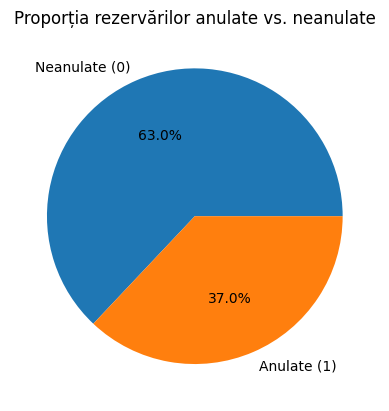

In [127]:
import matplotlib.pyplot as plt

counts = df['is_canceled'].value_counts()

plt.pie(counts, labels=['Neanulate (0)', 'Anulate (1)'], autopct='%1.1f%%')
plt.title("Proporția rezervărilor anulate vs. neanulate")
plt.show()

In [128]:
#Cate valori lipsa avem pentru fiecare tip de variabila?
print(df.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## **5.2. Curățare inițială dataset**
- eliminare duplicate
- tratare nulls
- modificarea coloanelor/tipurilor de date/valorilor
- stergere coloane
- adăugare coloane
- tratare outliers/aberații

In [129]:
df_clean = df.copy()

In [130]:
#ștergem Duplicatele din setul de date
n_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
print("dropped duplicates:", n_before - len(df_clean))

dropped duplicates: 31994


In [131]:
#reservation_status_date transformat in data (initial era object)
#normalizam (pastram luna, zi, an si ora 00:00:00)
df_clean['reservation_status_date'] = pd.to_datetime(df_clean['reservation_status_date'], errors='coerce')
df_clean['reservation_status_date'].dtype

dtype('<M8[ns]')

In [132]:
# children: înlocuim NA cu 0 si convertim din float la numeric
df_clean['children'] = pd.to_numeric(df_clean['children'], errors='coerce').fillna(0)
df_clean['children'].isna().sum()

np.int64(0)

Coloana **agent** conține coduri numerice între 1 și 535, fiecare reprezentând o agenție de turism. Pentru rezervările fără agent, valorile lipsă au fost înlocuite cu 0, ceea ce semnifică o rezervare directă iar campul transformat in int in loc de float.
În plus, a fost adăugată o coloană binară agent_missing, care indică dacă o rezervare a fost făcută de un agent sau nu. Această reprezentare numerică este mai eficientă pentru modelele ML, reduce dimensionalitatea și păstrează sensul economic al variabilei.

In [133]:
# creăm coloana care marchează dacă agentul lipsește
df_clean["agent_missing"] = df_clean["agent"].isna().astype(int)

# înlocuim valorile lipsă cu 0 (înseamnă rezervare fără agent)
df_clean["agent"] = df_clean["agent"].fillna(0)

# convertim la tip numeric coloana agent (int)
df_clean["agent"] = pd.to_numeric(df_clean["agent"], errors="coerce").astype(int)

In [134]:
# 94% lipsa-- Eliminam coloana company
df_clean = df_clean.drop(columns="company")

Folosind `mode` inlocuim valorile lipsa ale variabilei `country` cu cea mai frecventa valoare din dataset.
- calculează moda (valoarea care apare cel mai des).
- dropna=True înseamnă să NU ia în calcul valorile lipsă (NaN).
- .mode() poate returna mai multe valori dacă există modă multiplă.
- .iloc[0] selectează prima valoare.

In [135]:
#imputam valorile lipsa din country cu cea mai frecventa valore intalnita in dataset
mode_country = df_clean["country"].mode(dropna=True).iloc[0]
df_clean["country"] = df_clean["country"].fillna(mode_country)

In [136]:
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_missing
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [137]:
#verificăm dacă mai există valori lipsă
df_clean.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Adaugăm o coloană cu numărul total de oaspeti dintr-o rezervare calculat prin suma dintre adults, children si babies.

In [138]:
#vrem sa vedem nr total al oaspetilor dintr-o rezervare (adulti, copii, bebelusi)
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
print('Primele 5 inregistrari')
print(df_clean['total_guests'].head())

Primele 5 inregistrari
0    2.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: total_guests, dtype: float64


In [139]:
#rezervarile cu 0 oaspeti sunt irelevante - le stergem
zero_guests = (df_clean['total_guests'] == 0).sum()
print("rows with zero guests:", zero_guests)
df_clean = df_clean[df_clean['total_guests'] > 0].copy()

rows with zero guests: 166


In [140]:
#Eliminam recordurile unde ADR - Average Daily Rate (average revenue per occupied room) e negativ
neg_adr = (df_clean['adr'] < 0).sum()
print("negative adr rows:", neg_adr)
df_clean = df_clean[df_clean['adr'] >= 0].copy()

negative adr rows: 1


Numărul de nopți/rezervare este segmentat în două coloane **stays_in_weekend_nights** si **stays_in_week_nights** așa că le vom 'aduna' într-o singură coloană numită **total_nights**

In [141]:
# nr total de nopți petrecute la hotel într-o rezervare
if {"stays_in_weekend_nights", "stays_in_week_nights"}.issubset(df_clean.columns):
    df_clean["total_nights"] = (
        pd.to_numeric(df_clean["stays_in_weekend_nights"], errors="coerce").fillna(0)
        + pd.to_numeric(df_clean["stays_in_week_nights"],  errors="coerce").fillna(0)
    ).astype(int)

Verificăm potrivirea/conflictul dintre variabilele **reserved_room_type** și **assigned_room_type** printr o coloana suplimentara **room_mismatch**.
Dacă nu sunt identice coloana va avea valoarea 1.

In [142]:
#potrivire rezervare camera
if {"reserved_room_type","assigned_room_type"}.issubset(df_clean.columns):
    df_clean["room_mismatch"] = (
        df_clean["reserved_room_type"].astype(str) !=
        df_clean["assigned_room_type"].astype(str)
    ).astype(int)

In [143]:
#verificare
df_clean[["reserved_room_type", "assigned_room_type", "room_mismatch"]].head(5)

,reserved_room_type,assigned_room_type,room_mismatch
0,C,C,0
1,C,C,0
2,A,C,1
3,A,A,0
4,A,A,0


Distribuția variabilei `room_mismatch` arată că aproximativ 13% dintre rezervări au primit un tip de cameră diferit față de cel rezervat inițial, în timp ce majoritatea clienților (≈ 87%) au primit camera solicitată. Această variabilă este relevantă pentru analiză deoarece un mismatch poate influența satisfacția clientului, comportamentul ulterior și chiar probabilitatea de anulare.

In [144]:
#vrem să vedem câte rezervări au un mismatch
df_clean["room_mismatch"].value_counts()

,count
room_mismatch,
0,74240
1,12989


Câte coloane și observații mai avem?

In [145]:
print(f'Total number of records after cleaning: {df_clean.shape}')

Total number of records after cleaning: (87229, 35)


In [146]:
# Descarcam CSV clean (for future reference if the software fails)
#df_clean.to_csv("df_clean.csv", index=False)
#from google.colab import files
#files.download("df_clean.csv")

In [147]:
df_clean=pd.read_csv('df_clean.csv')

In [148]:
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_missing,total_guests,total_nights,room_mismatch
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,1,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,1,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,0,2.0,2,0


In [149]:
# tipuri utile (numerice / categorice)
num_cols = df_clean.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df_clean.select_dtypes(exclude=["number"]).columns.tolist()
print("numar coloane numerice:", len(num_cols), "numar coloane categoriale:", len(cat_cols))

numar coloane numerice: 23 numar coloane categoriale: 12


## **5.3. Analiză statistică**

Înțelegerea setului de date din perspectiva de business.
Mergem de la high-level-overview - analiza generala a tuturor variabilelor pentru a vedea mai apoi care dintre ele merita o analiza mai detaliata.

In [150]:
#Statistici descriptive generale pentru variabile numerice
#medii, minime, maxime, outlieri evidenți
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87229.0,0.275241,0.446638,0.0,0.00,0.0,1.0,1.0
lead_time,87229.0,79.969700,86.058295,0.0,11.00,49.0,125.0,737.0
arrival_date_year,87229.0,2016.210343,0.686063,2015.0,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,87229.0,26.835284,13.669175,1.0,16.00,27.0,37.0,53.0
arrival_date_day_of_month,87229.0,15.815956,8.835520,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,87229.0,1.004574,1.027364,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,87229.0,2.623887,2.039810,0.0,1.00,2.0,4.0,50.0
adults,87229.0,1.879364,0.621727,0.0,2.00,2.0,2.0,55.0
children,87229.0,0.138899,0.456267,0.0,0.00,0.0,0.0,10.0
babies,87229.0,0.010845,0.113704,0.0,0.00,0.0,0.0,10.0


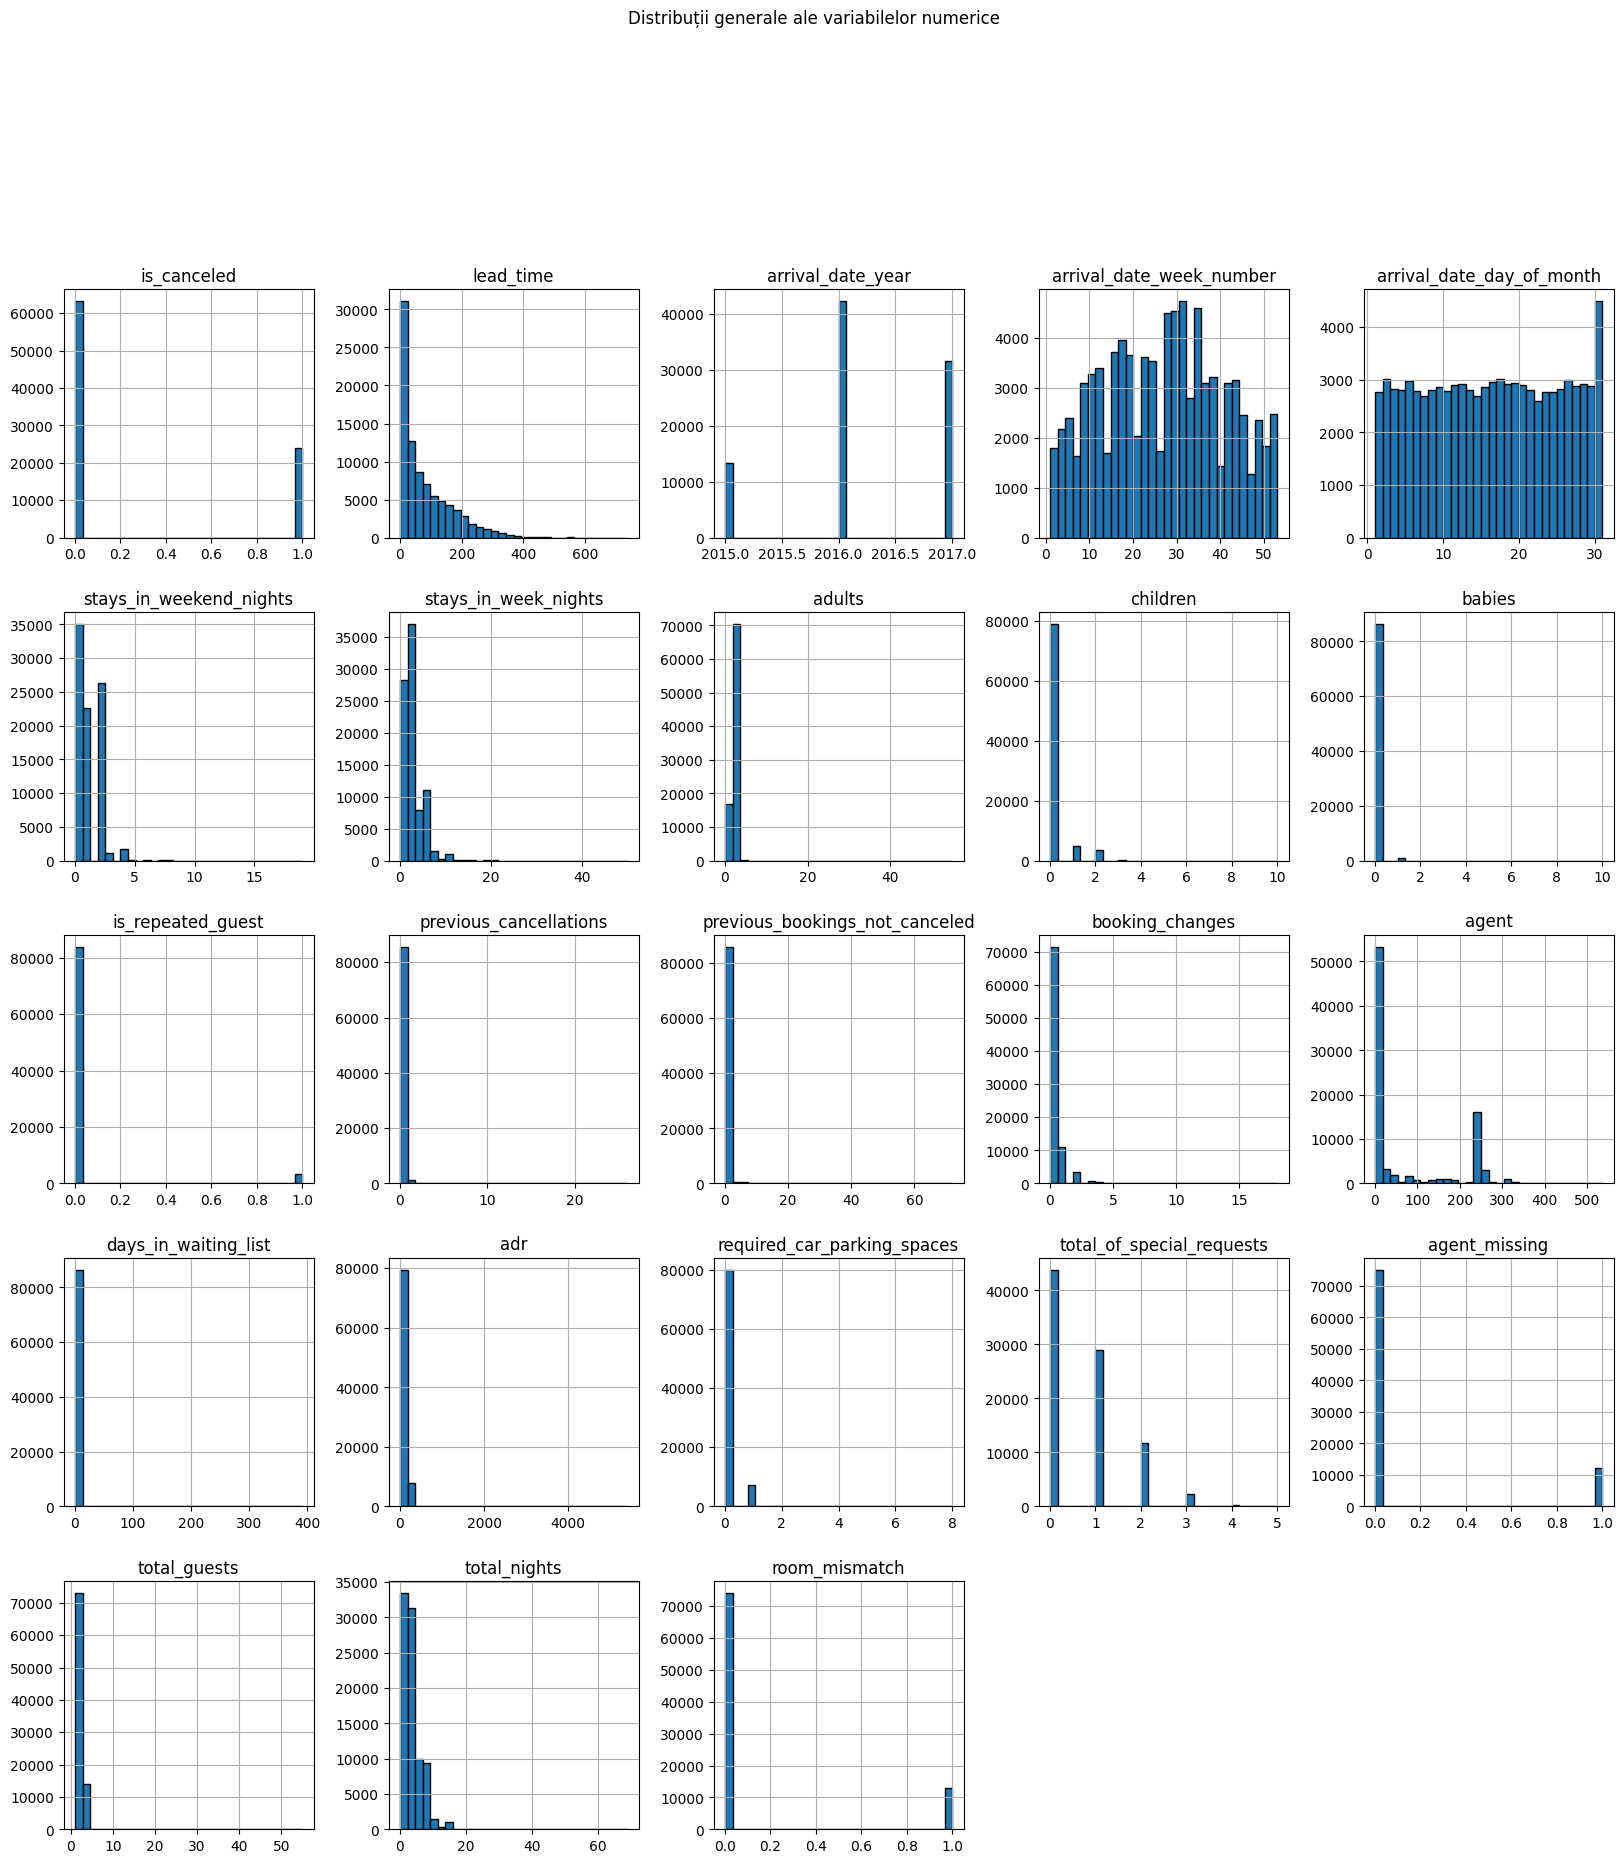

In [151]:
#Distribuția tuturor variabilelor numerice — histogram grid
df_clean.hist(figsize=(20,20), bins=30, edgecolor='black')
plt.suptitle("Distribuții generale ale variabilelor numerice", y=1.02)
plt.show()

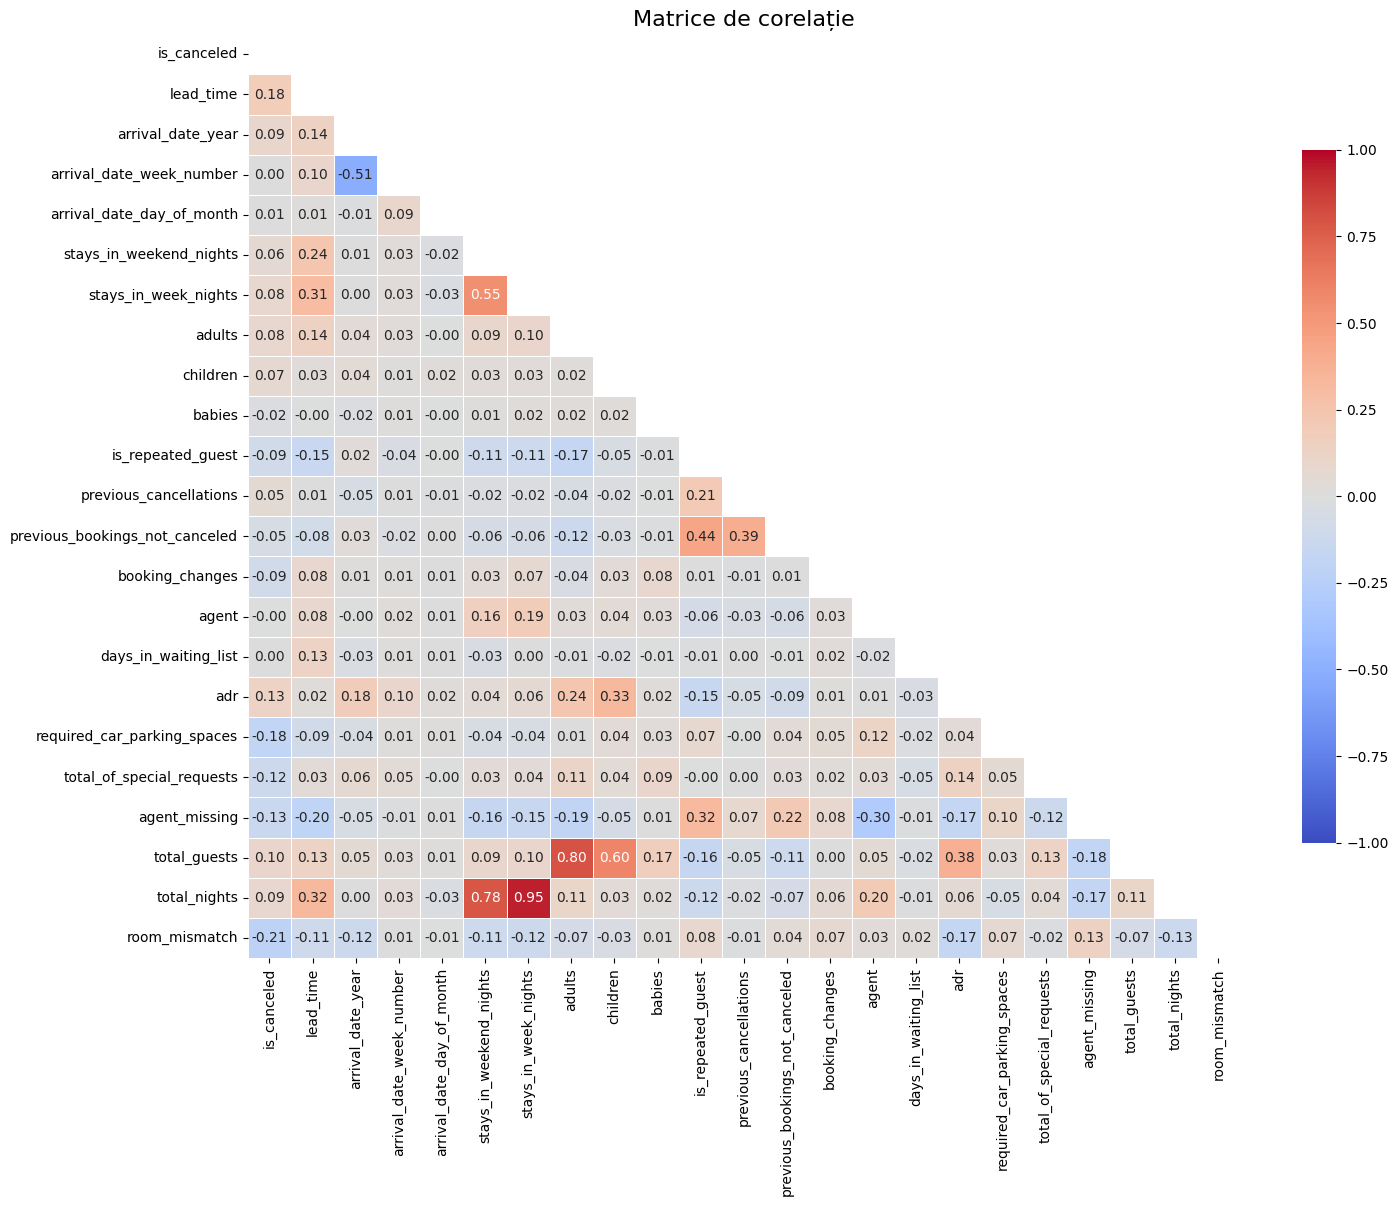

In [152]:
import seaborn as sns

numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    mask=mask,                      # mascăm jumătatea superioară
    cmap='coolwarm',
    annot=True,                     # afișăm valorile în celule
    fmt=".2f",                      # două zecimale
    vmin=-1, vmax=1,                # scală standard
    linewidths=.5,
    cbar_kws={"shrink": .75}
)

plt.title("Matrice de corelație", fontsize=16)
plt.show()

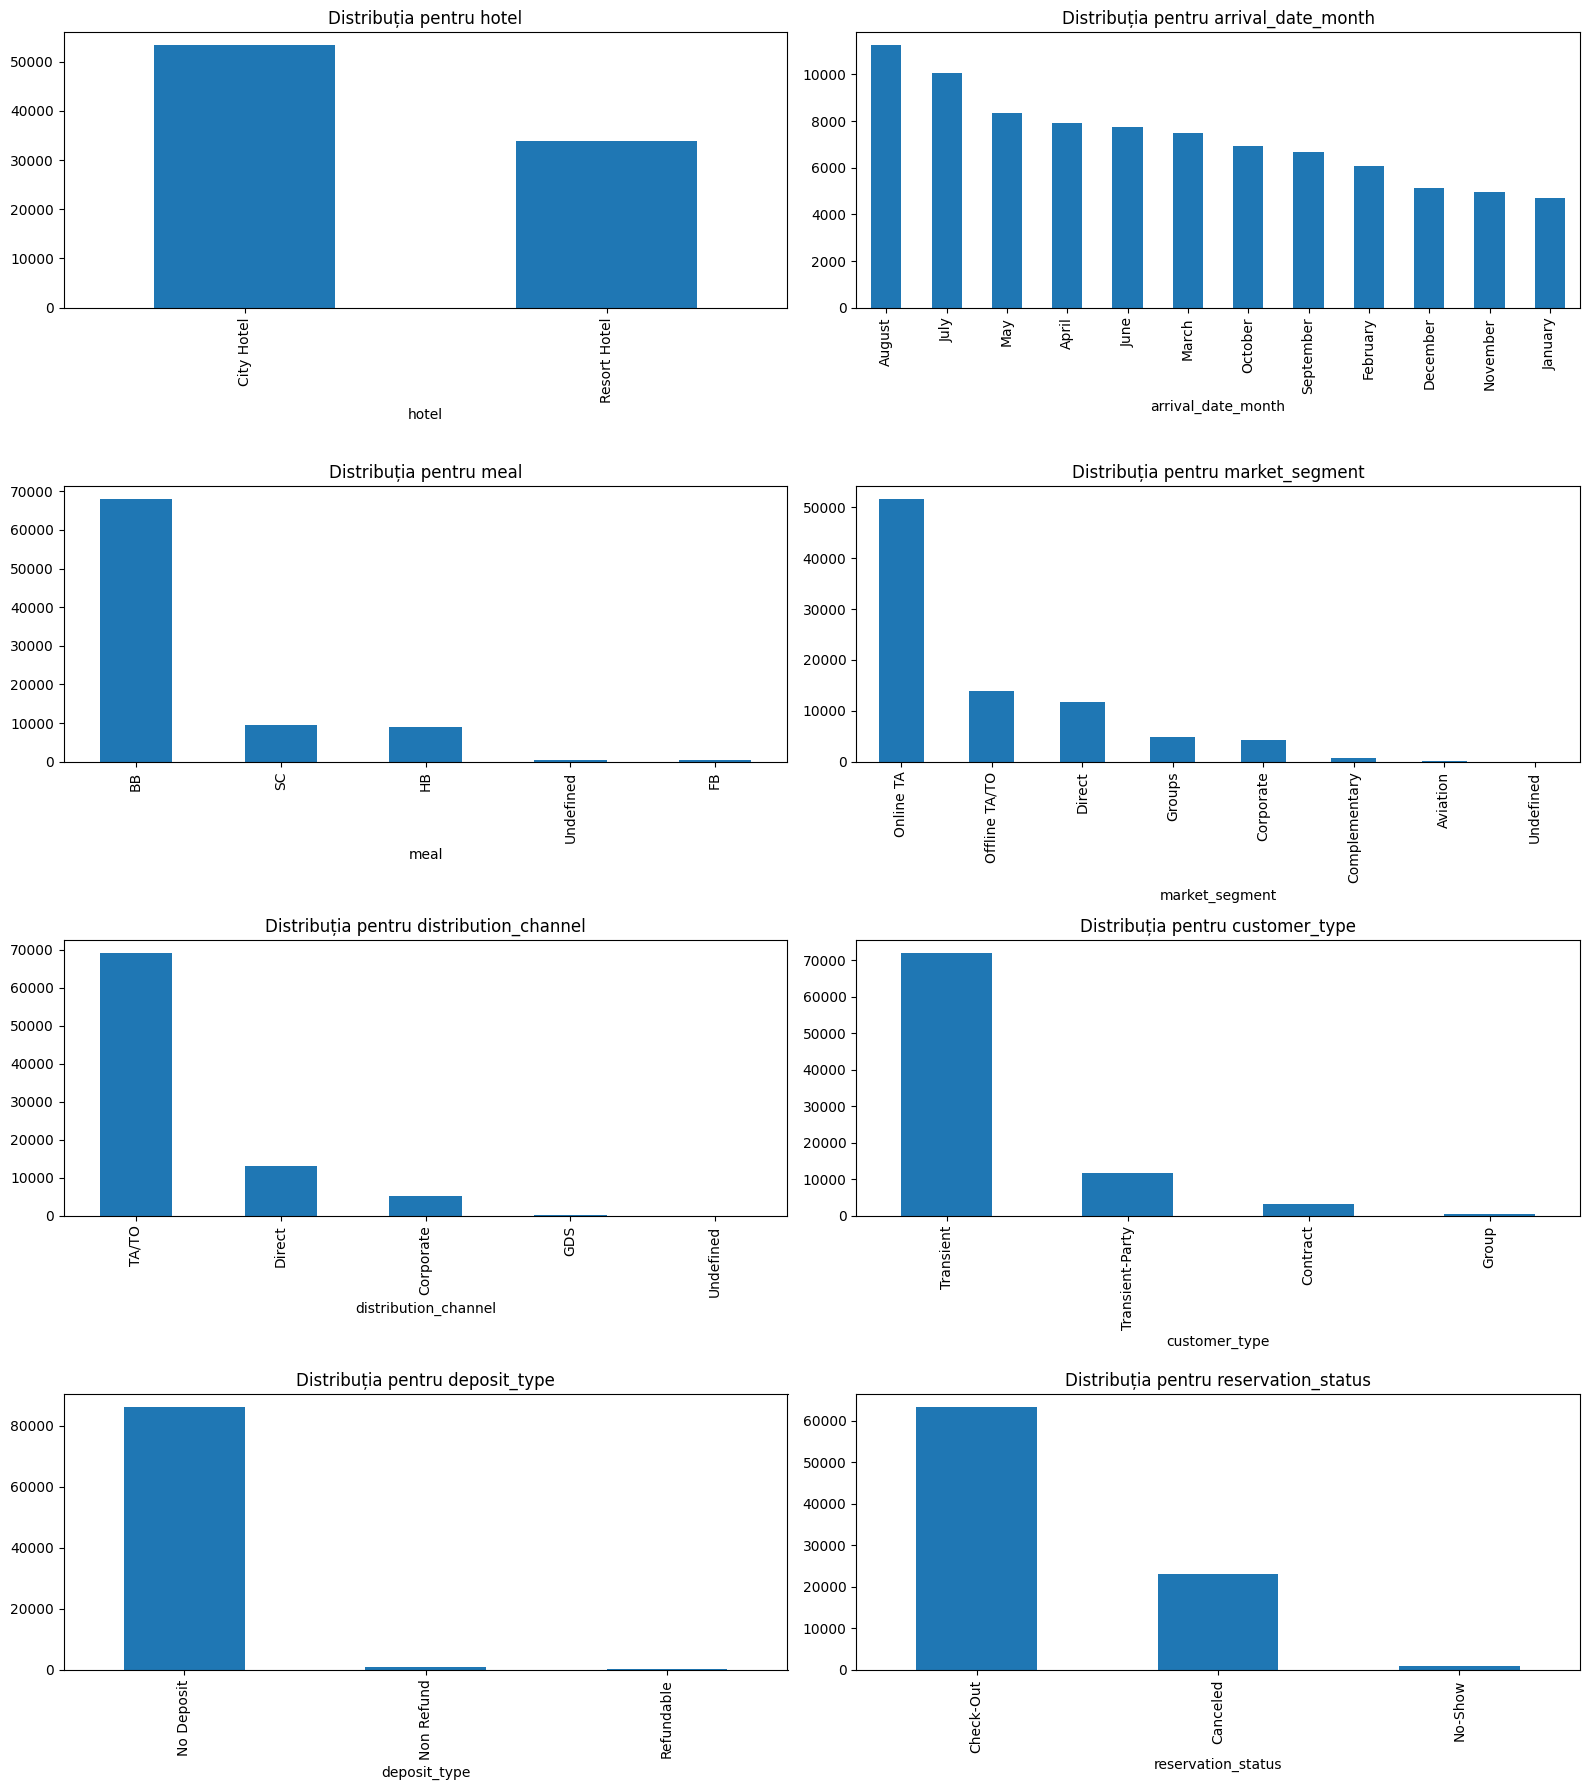

In [153]:
categorical_cols = [
    'hotel', 'arrival_date_month', 'meal',
    'market_segment', 'distribution_channel',
    'customer_type', 'deposit_type', 'reservation_status'
]

plt.figure(figsize=(16,18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4,2,i)
    df_clean[col].value_counts().plot(kind='bar')
    plt.title(f"Distribuția pentru {col}")
plt.tight_layout()
plt.show()

În urma analizei numericelor și a corelogramei, am identificat un set de variabile cu impact major asupra probabilității ca o rezervare hotelieră să fie anulată.

**Cele mai relevante variabile pozitive (care cresc probabilitatea de anulare)** sunt: lead_time, adr, total_nights, previous_cancellations, stays_in_week_nights/weekend_nights.

**Variabilele care reduc riscul de anulare sunt:** total_guests, required_car_parking_spaces, total_of_special_requests, agent_missing, precum și indicatorii sezonali precum arrival_date_week_number.
1. **lead_time** - Clienții care rezervă cu mult înainte tind să anuleze mai des. Distribuția este puternic skewed și are outlieri → este o variabilă volatilă, dar predictivă.
2. **adr = Average Daily Rate** - Prețurile mai mari sunt asociate cu un risc mai mare de anulare.
Clienții sensibili la preț tind să renunțe dacă găsesc oferte mai bune.
3. **total_nights** - Rezervările mai lungi sunt mai susceptibile la modificări și anulări- riscul crește odată cu durata șederii.
4. **total_guests** - Rezervările cu mai mulți oaspeți tind să fie mai serioase/mai bine planificate.
5. **required_car_parking_spaces** - Clienții care cer parcare (probabil turiști cu mașina personală) sunt mult mai deciși.
Se corelează cu rezervările serioase.
6. **arrival_date_week_number** - Captură sezonalitatea (vară ≠ iarnă).
Rata de anulare diferă în funcție de sezon.
7. **agent_missing** - Rezervările făcute fără agent (direct booking) pot avea comportament diferit.
8. **stays_in_week_nights & stays_in_weekend_nights** -  turiști de weekend, turiști de business etc.
9. **previous_cancellations** - Clienții cu istoric de anulări tind să repete comportamentul.
Variabilă foarte relevantă în context real, chiar dacă mulți au valoarea 0.
10. **total_of_special_requests** - Clienții cu cerințe speciale tind să fie mai implicați și renunță rar.

Matricea de corelație mai evidențiază mai multe grupuri de variabile puternic corelate între ele:

**stays_in_week_nights** ↔ **total_nights** (0.95)

stays_in_weekend_nights ↔ total_nights (0.78)

stays_in_weekend_nights ↔ stays_in_week_nights (0.55)

Aceste corelații ridicate reflectă faptul că aceste variabile sunt derivate din aceeași informație — numărul total de nopți ale sejurului. Pentru a evita redundanța în modele, vom păstra doar câte o variantă reprezentativă (ex.: total_nights).

De asemenea, observăm corelații ridicate între:

adults ↔ total_guests (0.80)

children ↔ total_guests (0.60)

Acest lucru era de așteptat deoarece total_guests este suma acestora. Și aici, pentru modele vom evita includerea simultană a tuturor acestor variabile pentru a reduce multicoliniaritatea.

Un alt aspect important este corelația pozitivă dintre:

previous_bookings_not_canceled ↔ previous_cancellations (0.39)
Aceasta arată comportamentul istoric al clienților, sugerând că unii clienți au un volum ridicat de rezervări anterioare, indiferent dacă au fost onorate sau anulate.

În ceea ce privește variabila-țintă is_canceled, corelațiile sale cu variabilele numerice sunt în general mici (sub ±0.20), ceea ce indică faptul că anularea nu depinde puternic de o singură variabilă numerică, ci de combinații non-liniare de factori. O corelație interesantă este:

is_canceled ↔ room_mismatch (−0.21)
Aceasta confirmă observația anterioară: mismatch-ul apare în mod predominant la rezervările onorate, nu la cele anulate.

Pentru a analiza și mai bine vizual distribuția geografică a clienților, vom realiza două hărți tematice folosind pachetul **Plotly Express**, care oferă suport interactiv și o reprezentare intuitivă a datelor la nivel de țară. Prima hartă agregă informația pe baza numărului total de clienți (total guests), iar a doua pe baza numărului total de rezervări efectuate din fiecare țară.

Aceste vizualizări permit identificarea rapidă a piețelor principale ale hotelurilor, evidențierea regiunilor cu cerere ridicată și compararea contribuției fiecărei țări atât în termeni de volum de oaspeți, cât și de frecvență a rezervărilor.

In [154]:
import plotly.express as px

# Eliminăm rezervările fără țară
df_geo = df_clean.dropna(subset=['country']).copy()

# 1. Total Guests per Country
guests_per_country = df_geo.groupby('country')['total_guests'].sum().reset_index()

# 2. Number of bookings per country
bookings_per_country = df_geo['country'].value_counts().reset_index()
bookings_per_country.columns = ['country', 'num_bookings']

guests_per_country.head(), bookings_per_country.head()

(  country  total_guests
 0     ABW           5.0
 1     AGO         628.0
 2     AIA           4.0
 3     ALB          21.0
 4     AND          19.0,
   country  num_bookings
 0     PRT         27802
 1     GBR         10423
 2     FRA          8823
 3     ESP          7244
 4     DEU          5385)

In [155]:
fig1 = px.choropleth(
    guests_per_country,
    locations="country",
    locationmode="ISO-3",
    color="total_guests",
    color_continuous_scale="Blues",
    title="Distribuția totală a oaspeților pe țări",
    labels={'total_guests': 'Număr total oaspeți'}
)

fig1.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    title_x=0.5
)

fig1.show()

In [156]:
fig2 = px.choropleth(
    bookings_per_country,
    locations="country",
    locationmode="ISO-3",
    color="num_bookings",
    color_continuous_scale="Reds",
    title="Numărul total de rezervări per țară",
    labels={'num_bookings': 'Număr rezervări'}
)

fig2.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    title_x=0.5
)

fig2.show()

Hărțile arată concentrația geografică a oaspeților hotelurilor, evidențiind Portugalia, Marea Britanie, Franța și Spania ca principale țări de origine ale clienților. Țările din Europa de Vest și de Nord contribuie cel mai mult la rezervări, în timp ce alte regiuni apar slab reprezentate.

**Cat de mult platesc clientii pe o noapte de cazare?**

Pentru a înțelege structura tarifelor practicate de hoteluri, analizăm distribuția valorii ADR (Average Daily Rate) în funcție de tipul de cameră rezervat.
Pentru variabila ADR (Average Daily Rate) am aplicat o winsorizare la percentila 99, deoarece distribuția prețurilor pe noapte este puternic dezechilibrată și include valori extreme (outlieri) care depășesc 5000 EUR/noapte.

Aceste valori sunt rare, nereprezentative și afectează negativ vizualizările, comprimând informația relevantă în partea inferioară a graficului.
Winsorizarea la P99 limitează influența acestor cazuri atipice fără a elimina observații din dataset, permițând o analiză mai clară și mai realistă a diferențelor de ADR între tipurile de camere.

In [157]:
#pastram doar rezervarile onorate
use = df_clean.query("is_canceled == 0").copy()

In [158]:
#Realizam winsorizare la percentila 99 (p99 este pragul deasupra căruia se află cele mai mari ~1% valori)
p99 = use["adr"].quantile(0.99)
use["adr_w"] = use["adr"].clip(upper=p99)

In [159]:
px.box(
    use, x="reserved_room_type", y="adr_w", color="hotel",
    points="outliers", title="ADR/noapte pe tip de cameră (p99 winsorized)"
).show()


Rezultatele arată diferențe semnificative între tipurile de camere, atât în ceea ce privește mediana prețului, cât și ca dispersia. În general, camerele din Resort Hotel prezintă tarife medii mai ridicate și o variabilitate mai mare, reflectând orientarea lor spre segmente turistice și sejururi mai lungi. În schimb, City Hotel are o structură de preț mai compactă și valori mediane mai mici, consistentă cu un profil urban și orientat spre sejururi scurte.

Winsorizarea la p99 a permis o reprezentare mai stabilă a distribuției, fără ca vizualizarea să fie distorsionată de tarifele extrem de mari. Diferențele clare între tipuri de camere sugerează că reserved_room_type este un feature cu potențial explicativ important în modelele de regresie sau clasificare.

In [160]:
summary = (use.groupby(["hotel","reserved_room_type"])["adr"]
             .agg(n="size", median="median")
             .sort_values(["hotel","median"], ascending=[True, False]))
print(summary.head(20))

                                     n   median
hotel        reserved_room_type                
City Hotel   G                     362  219.730
             F                    1076  187.850
             E                    1004  158.500
             D                    7068  130.000
             A                   27045   95.000
             C                       8   89.000
             B                     676   86.560
Resort Hotel H                     353  174.000
             L                       4  161.000
             C                     610  159.375
             G                     951  147.000
             F                     893  115.000
             B                       3  110.000
             E                    3386   94.935
             D                    5073   81.000
             A                   14708   58.500


**Cat de mult variaza pretul unei camere de a lungul anului (pe fiecare categorie de hotel)?**

In [161]:
#pastram rezervarile onorate
hotel = df_clean.query("is_canceled == 0").copy()

In [162]:
#declaram ordinea lunilor
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
hotel["arrival_date_month"] = pd.Categorical(hotel["arrival_date_month"], categories=month_order, ordered=True)

In [163]:
#grupam ADR in functie de hotel si de data sosirii
grp = (use.groupby(["hotel","arrival_date_month"])["adr"]
         .mean()
         .reset_index())
final_hotel = grp.pivot(index="arrival_date_month", columns="hotel", values="adr").reindex(month_order)
print(final_hotel.head(12))

hotel               City Hotel  Resort Hotel
arrival_date_month                          
January              83.378062     48.599615
February             88.210810     53.624311
March                91.306933     57.139009
April               114.251636     76.841664
May                 124.825944     77.725129
June                120.673753    109.026942
July                120.069489    150.914540
August              122.825388    182.103524
September           116.973279     98.855456
October             105.517410     62.634853
November             88.271089     48.956548
December             90.769559     64.072826


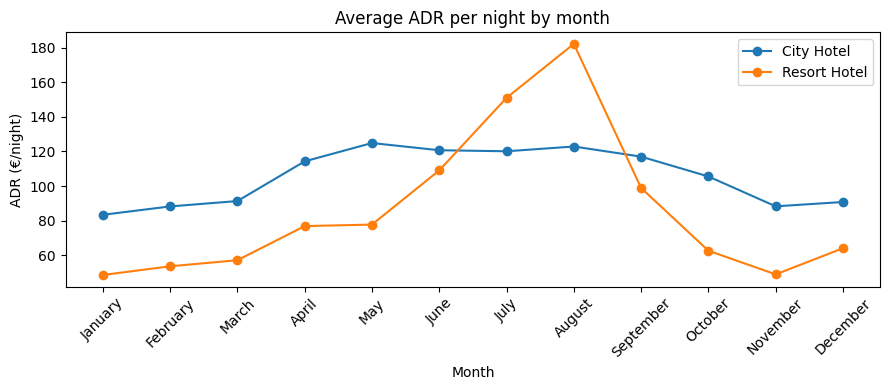

In [164]:
#vizualizam modul in care variaza pretul pe noapte la nivel de booking pe parcursul unui an
plt.figure(figsize=(9,4))
for col in final_hotel.columns:
    plt.plot(final_hotel.index.astype(str), final_hotel[col].values, marker="o", label=col)
plt.title("Average ADR per night by month")
plt.xlabel("Month"); plt.ylabel("ADR (€/night)")
plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

Graficul evidențiază o sezonalitate puternică a tarifelor hoteliere, cu diferențe clare între City Hotel și Resort Hotel. Resort Hotel prezintă o creștere accentuată a ADR în lunile de vară, atingând vârful în august – un comportament tipic pentru destinațiile turistice sezoniere. În schimb, City Hotel are un profil mult mai stabil pe parcursul anului, cu variații moderate și valori constante între lunile aprilie–septembrie, reflectând cererea mai puțin influențată de sezonul estival.

În ansamblu, aceste diferențe arată că tipul hotelului și sezonalitatea sunt determinanți majori ai prețului pe noapte, ceea ce justifică includerea ambelor variabile în modelele predictive de ADR.

**Dorim sa vedem si cum variaza valorile la nivelul hotelurilor pe parcursul a mai multor ani**

/tmp/ipython-input-3150717849.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



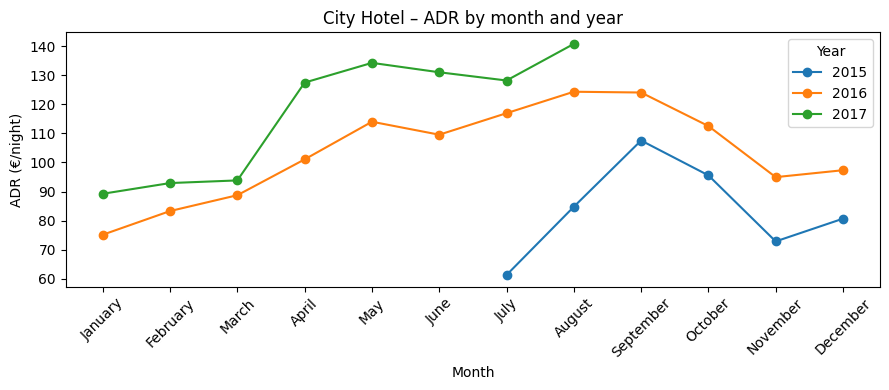

/tmp/ipython-input-3150717849.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



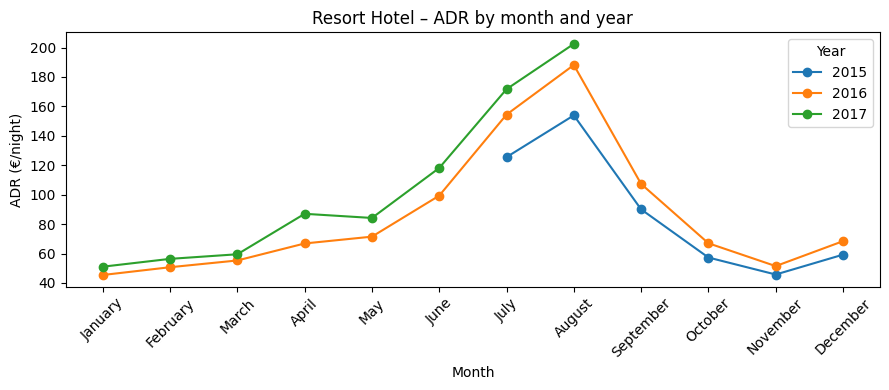

In [165]:
for h in sorted(use["hotel"].unique()):
        sub = use[use["hotel"] == h].copy()
        sub["arrival_date_month"] = pd.Categorical(sub["arrival_date_month"], categories=month_order, ordered=True)
        pivot = sub.pivot_table(index="arrival_date_month", columns="arrival_date_year", values="adr", aggfunc="mean").reindex(month_order)

        plt.figure(figsize=(9,4))
        for yr in pivot.columns:
            plt.plot(pivot.index.astype(str), pivot[yr].values, marker="o", label=str(yr))
        plt.title(f"{h} – ADR by month and year")
        plt.xlabel("Month"); plt.ylabel("ADR (€/night)")
        plt.xticks(rotation=45); plt.legend(title="Year"); plt.tight_layout(); plt.show()

Cele două grafice arată evoluția lunară a tarifelor ADR pentru City Hotel și Resort Hotel în anii 2015–2017, evidențiind atât sezonalitatea, cât și variațiile inter-anuale. În cazul City Hotel, prețurile sunt relativ stabile între ani, cu o creștere graduală în lunile aprilie–august și o scădere treptată spre final de an; variațiile între 2015 și 2017 sunt moderate, ceea ce sugerează o piață urbană mai puțin dependentă de sezonul turistic.

În schimb, Resort Hotel prezintă o sezonalitate mult mai pronunțată, cu vârfuri semnificative în lunile de vară, în special în iulie–august, unde anul 2017 înregistrează cele mai mari valori, urmat de scăderi rapide în septembrie–octombrie. Diferențele între ani sunt mai vizibile aici, indicând că zona de resort este influențată mai puternic de tendințele turistice și de variațiile cererii.

În ansamblu, comparația arată că Resort Hotel are o dinamică anuală și sezonieră mult mai accentuată decât City Hotel, iar astfel de diferențe justifică includerea variabilelor de tip year și month în modelele de regresie care urmăresc predicția valorii ADR.

**Ce impact are room_mismatch in anularea rezervarii?**

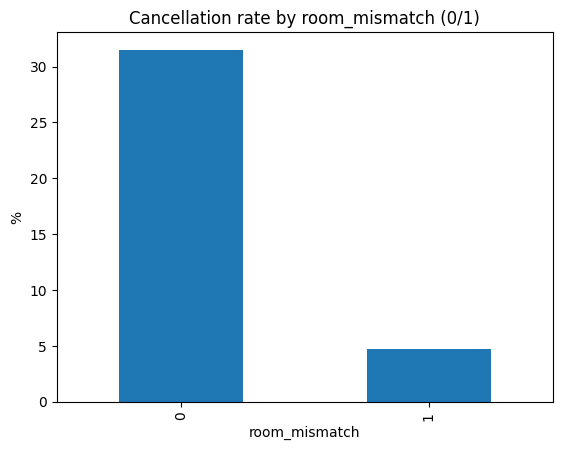

In [166]:
cr = df_clean.groupby("room_mismatch")["is_canceled"].mean().mul(100)
plt.figure(); cr.plot(kind="bar", title="Cancellation rate by room_mismatch (0/1)"); plt.ylabel("%"); plt.show()

Observăm că rezervările cu ‘room mismatch = 1’ au o rată de anulare mult mai mică decat cele fără mismatch.

Rezervările fără mismatch din punctul de vedere al tipului de camera au o rată de anulare mult mai mare pentru ca schimbarea tipului de camera se poate face in cele mai multe cazuri doar daca clientul se prezinta la hotel in ziua check-in-ului.

Altfel, daca nu se prezinta (rezervarea e anulata) tipul camerei nu poate fi schmbat.

Astfel, nu este un factor care reduce anularile.

**Cum este caracterizată relația dintre market segment și distribution channel?**

Pentru a înțelege modul în care segmentele de piață se suprapun cu canalele de distribuție utilizate, realizăm o crosstabularizare între variabilele market_segment și distribution_channel.

Normalizăm rezultatele pe rânduri pentru a obține proporții, nu valori brute, ceea ce ne permite să vedem, pentru fiecare segment, ce canal este predominant. Acest pas este util pentru identificarea tiparelor comportamentale ale clienților și a modului în care rezervările ajung la hotel.

In [167]:
print("--- Relația dintre Market Segment și Distribution Channel")
# Crosstabulation pentru a vedea cum se suprapun
crosstab_seg_dist = pd.crosstab(
    df_clean['market_segment'],
    df_clean['distribution_channel'],
    normalize='index' # Normalizăm pe rânduri pentru a vedea procentele
)
print(crosstab_seg_dist.to_markdown(floatfmt=".2f"))
print("\n")

--- Relația dintre Market Segment și Distribution Channel
| market_segment   |   Corporate |   Direct |   GDS |   TA/TO |   Undefined |
|:-----------------|------------:|---------:|------:|--------:|------------:|
| Aviation         |        0.96 |     0.00 |  0.00 |    0.04 |        0.00 |
| Complementary    |        0.11 |     0.78 |  0.00 |    0.11 |        0.00 |
| Corporate        |        0.93 |     0.04 |  0.00 |    0.04 |        0.00 |
| Direct           |        0.01 |     0.97 |  0.00 |    0.02 |        0.00 |
| Groups           |        0.14 |     0.13 |  0.00 |    0.73 |        0.00 |
| Offline TA/TO    |        0.01 |     0.00 |  0.00 |    0.99 |        0.00 |
| Online TA        |        0.00 |     0.00 |  0.00 |    0.99 |        0.00 |
| Undefined        |        0.00 |     0.00 |  0.00 |    0.00 |        1.00 |





Analizăm relația dintre tipul de avans (deposit_type) și probabilitatea de anulare a rezervării.

/tmp/ipython-input-2383792395.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




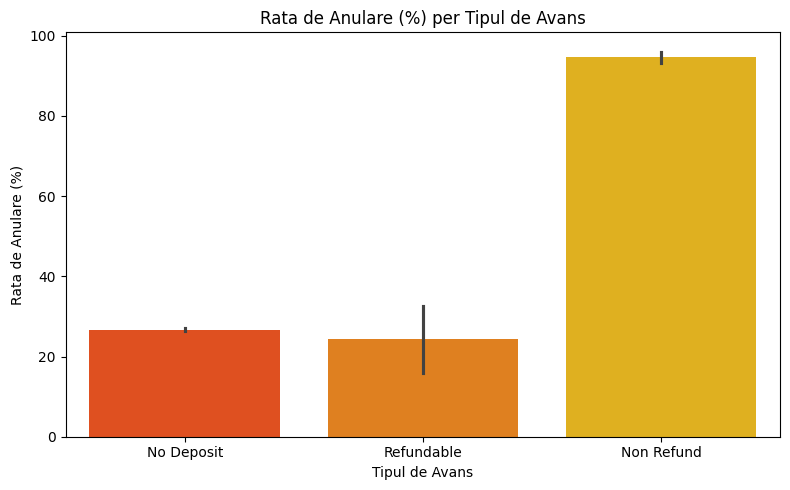

In [168]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_clean,
    x='deposit_type',
    y='is_canceled',
    estimator=lambda x: sum(x) / len(x) * 100,
    palette='autumn'
)
plt.title('Rata de Anulare (%) per Tipul de Avans')
plt.ylabel('Rata de Anulare (%)')
plt.xlabel('Tipul de Avans')
plt.tight_layout()
plt.savefig('deposit_cancellation_rate.png')
plt.show()

Rezervările fără avans („No Deposit”) și cele cu avans rambursabil („Refundable”) prezintă rate de anulare apropiate, în jur de 25-27%, ceea ce arată un comportament similar între aceste categorii.

În contrast, rezervările din categoria „Non Refund” au o rată de anulare extrem de ridicată, depășind 90%. Acest rezultat indică faptul că, în datasetul nostru, tipul „Non Refund” este puternic asociat cu anularea rezervării.

In [169]:
df_clean.groupby("deposit_type")["is_canceled"].agg(
    rate=lambda s: (s.mean()*100).round(1),
    n="size"
)

,rate,n
deposit_type,,
No Deposit,26.7,86084
Non Refund,94.7,1038
Refundable,24.3,107


In [170]:
pd.crosstab(df_clean["deposit_type"], df_clean["is_canceled"], margins=True)

is_canceled,0,1,All
deposit_type,,,
No Deposit,63084,23000,86084
Non Refund,55,983,1038
Refundable,81,26,107
All,63220,24009,87229


**Corelatia variabilelor numerice cu variabila is_cancelled**

Pentru a evalua dacă anumite caracteristici numerice au o relație liniară cu probabilitatea de anulare a rezervării, calculăm coeficientul Pearson între is_canceled și toate variabilele numerice.
Sortarea lor în ordine descrescătoare ne permite să identificăm rapid acei factori care au un impact (pozitiv sau negativ) asupra anulării, chiar dacă magnitudinea corelațiilor este redusă.

In [171]:
num_cols = df_clean.select_dtypes(include=["number"]).columns.tolist()
num_cols = [c for c in num_cols if c != "is_canceled"]
target_corr = df_clean[num_cols + ["is_canceled"]].corr()["is_canceled"].drop("is_canceled").sort_values(ascending=False)
print(target_corr.round(3))

lead_time                         0.185
adr                               0.127
total_guests                      0.099
arrival_date_year                 0.088
total_nights                      0.085
stays_in_week_nights              0.084
adults                            0.080
children                          0.067
stays_in_weekend_nights           0.061
previous_cancellations            0.052
arrival_date_day_of_month         0.005
days_in_waiting_list              0.005
arrival_date_week_number          0.002
agent                            -0.001
babies                           -0.021
previous_bookings_not_canceled   -0.052
is_repeated_guest                -0.089
booking_changes                  -0.093
total_of_special_requests        -0.121
agent_missing                    -0.133
required_car_parking_spaces      -0.184
room_mismatch                    -0.213
Name: is_canceled, dtype: float64


**lead_time** (0.185) – prima corelație pozitivă semnificativă: cu cât trece mai mult timp între rezervare și sosire, cu atât crește probabilitatea de anulare. Acesta este un factor cunoscut în industrie.

**adr** (0.127) – rezervările mai scumpe au o probabilitate ceva mai mare de a fi anulate.

**total_guests**(0.099) și total_nights (0.085) – efecte pozitive slabe, dar consistente.

**room_mismatch** (−0.213) – confirmă observațiile anterioare: mismatch-ul camere–tip apare aproape exclusiv la rezervările onorate, nu la cele anulate.

**agent_missing** (−0.133) și required_car_parking_spaces (−0.184) – valori negative moderate, ce sugerează comportamente diferite pentru clienții care rezervă fără agent sau pentru cei care solicită loc de parcare.

**Analiza corelației dintre variabilele categorice și rata de anulare (`is_canceled`)**

Pentru variabilele categorice, corelația liniară nu este aplicabilă, așa că evaluăm relația dintre fiecare categorie și variabila țintă prin calculul ratei de anulare pentru fiecare valoare distinctă.

Prin această analiză putem identifica grupurile de clienți sau tipurile de rezervări asociate cu o probabilitate mai mare de anulare, informații care sunt esențiale pentru modelele predictive și pentru interpretarea comportamentului clienților.

In [172]:
cats = df_clean.select_dtypes(exclude=["number","datetime64[ns]"]).columns
for col in ["deposit_type","market_segment","distribution_channel","customer_type","hotel","arrival_date_month"]:
    if col in cats:
        print(col, (df_clean.groupby(col)["is_canceled"].mean()*100).sort_values(ascending=False).round(1).head(10))

deposit_type deposit_type
Non Refund    94.7
No Deposit    26.7
Refundable    24.3
Name: is_canceled, dtype: float64
market_segment market_segment
Undefined        100.0
Online TA         35.4
Groups            27.1
Aviation          19.9
Offline TA/TO     14.8
Direct            14.7
Complementary     12.3
Corporate         12.1
Name: is_canceled, dtype: float64
distribution_channel distribution_channel
Undefined    80.0
TA/TO        31.0
GDS          19.9
Direct       14.8
Corporate    12.8
Name: is_canceled, dtype: float64
customer_type customer_type
Transient          30.1
Contract           16.3
Transient-Party    15.3
Group               9.8
Name: is_canceled, dtype: float64
hotel hotel
City Hotel      30.1
Resort Hotel    23.5
Name: is_canceled, dtype: float64
arrival_date_month arrival_date_month
August       32.2
July         31.8
April        30.5
June         30.3
May          29.3
December     26.9
September    24.6
March        24.4
October      23.7
February     23.2
Name:

Variabilele categorice precum deposit_type, market_segment, distribution_channel, customer_type și arrival_date_month sunt mult mai informative pentru predicția anulării decât variabilele numerice.
Aceste diferențe justifică includerea lor în modelele de clasificare prin tehnici de encoding adecvate (**One-Hot Encoding, Target Encoding** etc.), întrucât ele surprind direct comportamentele distincte ale diferitelor grupuri de clienți.

## **5.4. Tratare variabile categoriale si variabile cu coliniaritate mare**

In [173]:
df_model = df_clean.copy()

1. Mapam arrival_date_month ca sa o avem in format numeric

In [174]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_model['arrival_date_month'] = df_clean['arrival_date_month'].map(month_map)

2. Definim mapping-ul pentru meal conform documentatiei:
Type of meal booked. Categories are presented in standard hospitality meal packages:

- Undefined/SC – no meal package; (0 mese)

- BB – Bed & Breakfast; (1 masa )

- HB – Half board (breakfast and one other meal – usually dinner); (2 mese)
- FB – Full board (breakfast, lunch and dinner) (complet, 3 mese)

In [175]:
# Verificăm valorile unice și frecvența pentru 'meal'
print("Valori distincte pentru 'meal':")
print(df_model['meal'].value_counts(dropna=False))

Valori distincte pentru 'meal':
meal
BB           67906
SC            9391
HB            9080
Undefined      492
FB             360
Name: count, dtype: int64


In [176]:
# Mapping logic în funcție de tipul de masă
meal_map = {
    'SC': 0,
    'Undefined': 0,
    'BB': 1,
    'HB': 2,
    'FB': 3
}

# Aplicăm mappingul pe dataset
df_model['meal_encoded'] = df_model['meal'].map(meal_map).fillna(0)

In [177]:
#Verificare
print(df_model[['meal', 'meal_encoded']].head(10))

  meal  meal_encoded
0   BB             1
1   BB             1
2   BB             1
3   BB             1
4   BB             1
5   BB             1
6   FB             3
7   BB             1
8   HB             2
9   BB             1


Aplicam Binary Encoding pentru hotel si creem o mapare de tip Ordinal Encoding pentru deposit_type.

In [178]:
#encoding hotel
df_model['hotel_encoded'] = (df_model['hotel'] == 'Resort Hotel').astype(int)
#0 = City Hotel, 1 = Resort Hotel

In [179]:
#encoding deposit_type
deposit_map = {'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2}
df_model['deposit_encoded'] = df_model['deposit_type'].map(deposit_map)

In [180]:
df_model.drop(columns=['deposit_type'], inplace=True, errors='ignore')

Pentru variabilele nominale, fara o ordine logica folosim One Hot Encoding.

In [181]:
#market_segment si distribution_channel - One Hot Encoding
df_model = pd.get_dummies(df_model, columns=['market_segment'], drop_first=True)

In [182]:
df_model = pd.get_dummies(df_model, columns=['distribution_channel'], drop_first=True)

In [183]:
#customer_type - One Hot Encoding
df_model = pd.get_dummies(df_model, columns=['customer_type'], drop_first=True)

Pentru country pastram top 10 tari (pentru a nu adauga foarte multe coloane), restul le inclocuim cu Other Apoi facem One Hot Enoding

In [184]:
#Pentru country vrem sa vedem distribuția rezervărilor pe țări (în procente) ca sa decidem la cat reducem
country_counts = (
    df_clean['country']
    .value_counts(normalize=True)   # normalize=True => proporții în loc de numere absolute
    .mul(100)                       # transformăm în procente
    .round(2)                       # rotunjim
)

# Afișăm primele 15 țări
print(" Top 15 țări după ponderea rezervărilor (% din total):")
print(country_counts.head(15))

# Calculăm cât acoperă primele 10 țări
coverage_top10 = country_counts.head(10).sum()
coverage_top15 = country_counts.head(15).sum()
print(f"\n Primele 10 țări acoperă aproximativ {coverage_top10:.1f}% din totalul rezervărilor.")
print(f"\n Primele 15 țări acoperă aproximativ {coverage_top15:.1f}% din totalul rezervărilor.")

 Top 15 țări după ponderea rezervărilor (% din total):
country
PRT    31.87
GBR    11.95
FRA    10.11
ESP     8.30
DEU     6.17
ITA     3.51
IRL     3.46
BEL     2.39
BRA     2.28
NLD     2.19
USA     2.14
CHE     1.80
CN      1.25
AUT     1.09
SWE     0.95
Name: proportion, dtype: float64

 Primele 10 țări acoperă aproximativ 82.2% din totalul rezervărilor.

 Primele 15 țări acoperă aproximativ 89.5% din totalul rezervărilor.


In [185]:
top_countries = df_model['country'].value_counts().nlargest(10).index
df_model['country_simplified'] = df_model['country'].apply(lambda x: x if x in top_countries else 'Other')
df_model = pd.get_dummies(df_model, columns=['country_simplified'], drop_first=True)

**Similar si pentru reserved_room_type și assigned_room_type.**

In [186]:
#La fel procedam si pentru coloanele privind tipul de camera
#Vedem distributia
# Distribuția procentuală a tipurilor de camere rezervate
reserved_room_pct = (
    df_model['reserved_room_type']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

print(" Distribuția camerelor rezervate (% din total):")
print(reserved_room_pct)

coverage_reserved = reserved_room_pct.head(5).sum()
print(f"\nTop 5 tipuri de camere rezervate acoperă {coverage_reserved:.1f}% din total.")

# Distribuția procentuală a camerelor atribuite efectiv
assigned_room_pct = (
    df_model['assigned_room_type']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

print("\n Distribuția camerelor atribuite (% din total):")
print(assigned_room_pct)

coverage_assigned = assigned_room_pct.head(5).sum()
print(f"\nTop 5 tipuri de camere atribuite acoperă {coverage_assigned:.1f}% din total.")

 Distribuția camerelor rezervate (% din total):
reserved_room_type
A    64.70
D    19.92
E     6.92
F     3.23
G     2.35
B     1.14
C     1.05
H     0.68
L     0.01
Name: proportion, dtype: float64

Top 5 tipuri de camere rezervate acoperă 97.1% din total.

 Distribuția camerelor atribuite (% din total):
assigned_room_type
A    53.06
D    25.70
E     8.24
F     4.16
G     2.86
C     2.48
B     2.08
H     0.81
I     0.40
K     0.21
L     0.00
Name: proportion, dtype: float64

Top 5 tipuri de camere atribuite acoperă 94.0% din total.


Primele 5 tipuri de camere prezinta mai mult de 90% din total, deci doar pe acestea le pastram.

In [187]:
for col in ['reserved_room_type', 'assigned_room_type']:
    top_rooms = df_model[col].value_counts().nlargest(5).index
    df_model[col] = df_model[col].apply(lambda x: x if x in top_rooms else 'Other')

df_model = pd.get_dummies(df_model, columns=['reserved_room_type', 'assigned_room_type'], drop_first=True)

Eliminăm coloanele cărora le-am făcut encoding.


In [188]:
#stergem coloanele carora le am facut encoding
df_model.drop(columns=['country','hotel','meal'], inplace=True, errors='ignore')

 Creem o versiune a datasetului in care pastram coloanele de reservation status si reservation status date pentru a le putea folosi **(poate)** in alte modele ce **nu prezic** direct is_canceled.

**df_model_status**


In [189]:
df_model_status=df_model.copy()

Facem encoding si variabilelor ce au mai ramas.

S-a citit din nou setul de date si trebuie sa facem iar reservation_status_date de tip date

In [190]:
df_model_status['reservation_status_date'].dtype

dtype('O')

In [193]:
#reservation_status_date transformat in data (initial era object)
#normalizam (pastram luna, zi, an si ora 00:00:00)
df_model_status['reservation_status_date'] = pd.to_datetime(df_model_status['reservation_status_date'], errors='coerce')
df_model_status['reservation_status_date'].dtype

dtype('<M8[ns]')

In [194]:
#Enocding status
status_map = {
    'Canceled': 0,
    'Check-Out': 1,
    'No-Show': 2
}
df_model_status['reservation_status_encoded'] = df_model_status['reservation_status'].map(status_map)

In [195]:
#Encoding pt data rezervarii - coloane pt an/luna/zi
df_model_status['status_year'] = df_model_status['reservation_status_date'].dt.year
df_model_status['status_month'] = df_model_status['reservation_status_date'].dt.month
df_model_status['status_weekday'] = df_model_status['reservation_status_date'].dt.weekday

In [196]:
#in df_model dam drop la coloane pentru ca sunt redundante si nu ne trebuie deloc (ele practic PREZIC is_cancelled)
df_model.drop(columns=['reservation_status','reservation_status_date'], inplace=True, errors='ignore')

In [197]:
#in df_model_status dam drop la coloane pentru ca le avem pe cele encoded
df_model_status.drop(columns=['reservation_status','reservation_status_date'], inplace=True, errors='ignore')

Vom da drop la coloana agent pentru ca are cardinalitate foarte mare, si vom inlocui coloana 'agent_missing' cu 'has_agent' pentru claritate

In [198]:
df_model['has_agent'] = 1 - df_model['agent_missing']
df_model.drop(columns=['agent_missing'], inplace=True)

In [199]:
df_model_status['has_agent'] = 1 - df_model_status['agent_missing']
df_model_status.drop(columns=['agent_missing'], inplace=True)

In [200]:
df_model.drop(columns=['agent'],inplace=True)
df_model_status.drop(columns=['agent'],inplace=True)

In [201]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87229 entries, 0 to 87228
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87229 non-null  int64  
 1   lead_time                       87229 non-null  int64  
 2   arrival_date_year               87229 non-null  int64  
 3   arrival_date_month              87229 non-null  int64  
 4   arrival_date_week_number        87229 non-null  int64  
 5   arrival_date_day_of_month       87229 non-null  int64  
 6   stays_in_weekend_nights         87229 non-null  int64  
 7   stays_in_week_nights            87229 non-null  int64  
 8   adults                          87229 non-null  int64  
 9   children                        87229 non-null  float64
 10  babies                          87229 non-null  int64  
 11  is_repeated_guest               87229 non-null  int64  
 12  previous_cancellations          

In [202]:
df_model_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87229 entries, 0 to 87228
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87229 non-null  int64  
 1   lead_time                       87229 non-null  int64  
 2   arrival_date_year               87229 non-null  int64  
 3   arrival_date_month              87229 non-null  int64  
 4   arrival_date_week_number        87229 non-null  int64  
 5   arrival_date_day_of_month       87229 non-null  int64  
 6   stays_in_weekend_nights         87229 non-null  int64  
 7   stays_in_week_nights            87229 non-null  int64  
 8   adults                          87229 non-null  int64  
 9   children                        87229 non-null  float64
 10  babies                          87229 non-null  int64  
 11  is_repeated_guest               87229 non-null  int64  
 12  previous_cancellations          

In [205]:
#df_model.to_csv("df_model.csv", index=False)
#from google.colab import files
#files.download("df_model.csv")

In [206]:
#df_model_status.to_csv("df_model_status.csv", index=False)
#from google.colab import files
#files.download("df_model_status.csv")

# **6. Antrenarea modelelor**

## **1. Random Forest Classifier pentru variabila is_cancelled**

Principiu de funcționare - Random Forest Classifier:

Random Forest Classifier construiește un ansamblu de arbori de decizie independenți, fiecare antrenat pe eșantioane bootstrap ale datasetului. La predicție, fiecare arbore votează clasa estimată, iar modelul final returnează clasa cu cele mai multe voturi

Algoritm Random Forest Classifier cu variabila tinta is_canceled - prezicerea probabilitatii ca o rezervare sa fie anulata sau nu.

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler

In [246]:
df_model = pd.read_csv("/content/df_model.csv")
print(f"Dimensiune dataset: {df_model.shape}")
df_model.head()

Dimensiune dataset: (87229, 60)


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_Other,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_Other,has_agent
0,0,342,2015,7,27,1,0,0,2,0.0,...,False,False,False,True,False,False,False,False,True,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,False,False,False,True,False,False,False,False,True,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,False,False,False,False,False,False,False,False,True,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,False,False,False,False,False,False,False,False,False,1
4,0,14,2015,7,27,1,0,2,2,0.0,...,False,False,False,False,False,False,False,False,False,1


In [211]:
# Variabila tinta "is_canceled" este separata de restul coloanelor
X = df_model.drop(columns=['is_canceled'])
y = df_model['is_canceled']

print(f"Set de inputuri (X): {X.shape}")
print(f"Variabilă țintă (y): {y.shape}")

Set de inputuri (X): (87229, 59)
Variabilă țintă (y): (87229,)


In [213]:
# Datele sunt impartite in seturi de
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Verificarea dimensiunilor
print(f"Set antrenare (X_train): {X_train.shape}")
print(f"Set testare (X_test): {X_test.shape}")
print(f"Set antrenare (y_train): {y_train.shape}")
print(f"Set testare (y_test): {y_test.shape}")

Set antrenare (X_train): (61060, 59)
Set testare (X_test): (26169, 59)
Set antrenare (y_train): (61060,)
Set testare (y_test): (26169,)


In [214]:
# Scalam datele prin StandardScaler pentru a aduce variabilele numerice pe o scara comuna.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificare
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

X_train_scaled: (61060, 59)
X_test_scaled: (26169, 59)


In [215]:
#Initializam si antrenam modelul Random Forest Classifier.
rf_clf = RandomForestClassifier(
    n_estimators=1000,     # numărul de arbori (default = 100)
    random_state=42,
    n_jobs=-1,            # nucleele CPU utilizate(-1 = toate)
    verbose=1             # pentru a vedea progresul în consolă
)

# Antrenarea modelului pe datele scalate
rf_clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.7min finished


RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42, verbose=1)

In [217]:
#Salvam local modelul in caz de orice
import joblib

joblib.dump(rf_clf, "random_forest_model.pkl")
print("Model salvat cu succes!")

#pentru a-l incarca
#import joblib

#rf_loaded = joblib.load("random_forest_model.pkl")
#print("Model încărcat!")

Model salvat cu succes!


In [216]:
# Predictii si evaluarea performantei modelului prin utilizarea metricilor :
# - Accuracy
# - Precision
# - Recall
# - F1-score

# Predicții pe datele de test
y_pred = rf_clf.predict(X_test_scaled)

# Calcularea metricilor de performanță
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Rezultate
print(" Performanța modelului Random Forest Classifier:")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   11.0s


 Performanța modelului Random Forest Classifier:
Accuracy : 0.848
Precision: 0.764
Recall   : 0.645
F1-score : 0.700


[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   13.5s finished


Vom aplica SMOTE pentru balansarea modelului si antrenarea mai buna.

SMOTE generează observații sintetice pentru clasa minoritară (is_canceled = 1) utilizând interpolarea între vecinii cei mai apropiați. Oversampling-ul este aplicat exclusiv pe setul de antrenament pentru a preveni data leakage. În urma aplicării SMOTE, distribuția claselor este echilibrată, ceea ce permite modelelor ML să învețe corect și să reducă bias-ul față de clasa majoritară.

In [219]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inițializam SMOTE
smote = SMOTE(random_state=42)

# Aplicam SMOTE doar pe setul de antrenare
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Afișam distribuția claselor înainte și după SMOTE
print(" Distribuție înainte de SMOTE:", Counter(y_train))
print(" Distribuție după SMOTE:", Counter(y_train_balanced))

 Distribuție înainte de SMOTE: Counter({0: 44254, 1: 16806})
 Distribuție după SMOTE: Counter({0: 44254, 1: 44254})


In [220]:
# Reantrenarea modelului
rf_clf_balanced = RandomForestClassifier(
    n_estimators=1000,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Antrenăm modelul pe datele echilibrate
rf_clf_balanced.fit(X_train_balanced, y_train_balanced)

# Facem predicții pe setul de test
y_pred_balanced = rf_clf_balanced.predict(X_test_scaled)

# Calculăm noile metrici
accuracy_bal = accuracy_score(y_test, y_pred_balanced)
precision_bal = precision_score(y_test, y_pred_balanced)
recall_bal = recall_score(y_test, y_pred_balanced)
f1_bal = f1_score(y_test, y_pred_balanced)

# Afișăm noile rezultate
print("\n Performanța modelului Random Forest după SMOTE:")
print(f"Accuracy : {accuracy_bal:.3f}")
print(f"Precision: {precision_bal:.3f}")
print(f"Recall   : {recall_bal:.3f}")
print(f"F1-score : {f1_bal:.3f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    4.9s



 Performanța modelului Random Forest după SMOTE:
Accuracy : 0.846
Precision: 0.734
Recall   : 0.693
F1-score : 0.713


[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    6.1s finished


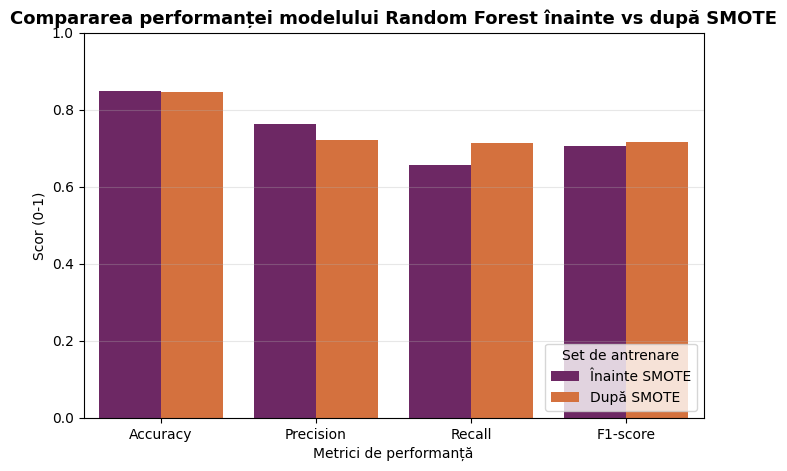

In [222]:
# Grafice comparative inainte si dupa SMOTE
metrics_before = {
    'Accuracy': 0.849,
    'Precision': 0.763,
    'Recall': 0.656,
    'F1-score': 0.706
}

metrics_after = {
    'Accuracy': 0.845,
    'Precision': 0.721,
    'Recall': 0.712,
    'F1-score': 0.717
}

metrics_df = pd.DataFrame({
    'Metrică': list(metrics_before.keys()),
    'Înainte SMOTE': list(metrics_before.values()),
    'După SMOTE': list(metrics_after.values())
})

plt.figure(figsize=(8,5))
sns.barplot(data=metrics_df.melt(id_vars='Metrică', var_name='Model', value_name='Valoare'),
            x='Metrică', y='Valoare', hue='Model', palette='inferno')

plt.title("Compararea performanței modelului Random Forest înainte vs după SMOTE", fontsize=13, weight='bold')
plt.ylim(0, 1)
plt.ylabel("Scor (0-1)")
plt.xlabel("Metrici de performanță")
plt.legend(title='Set de antrenare', loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.show()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    5.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   13.1s finished


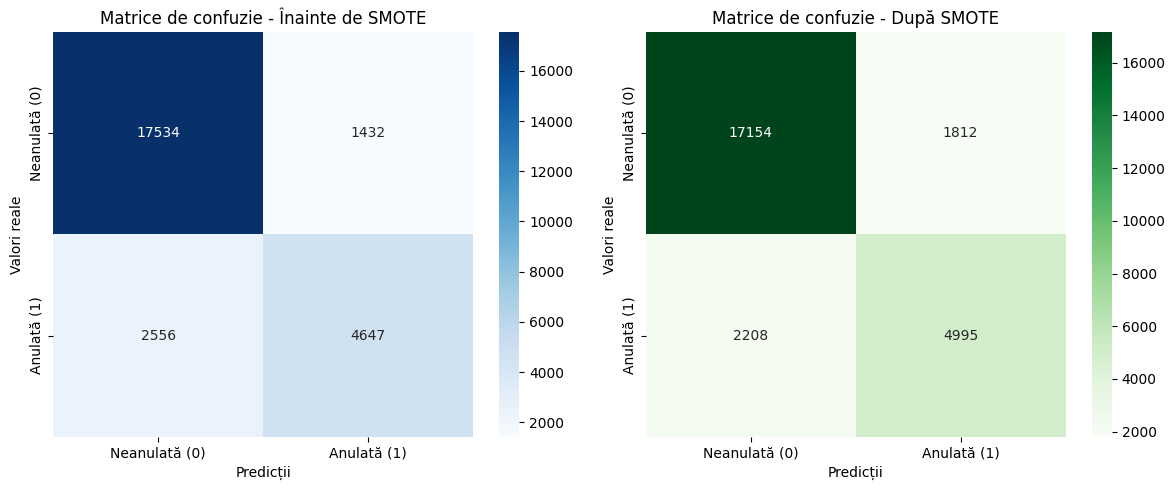

In [223]:
# Matricea de confuzie - înainte de SMOTE
y_pred_before = rf_clf.predict(X_test_scaled)
cm_before = confusion_matrix(y_test, y_pred_before)

# Matricea de confuzie - după SMOTE
cm_after = confusion_matrix(y_test, y_pred_balanced)

# Vizualizare comparativă
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Înainte de SMOTE
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matrice de confuzie - Înainte de SMOTE")
axes[0].set_xlabel("Predicții")
axes[0].set_ylabel("Valori reale")
axes[0].set_xticklabels(["Neanulată (0)", "Anulată (1)"])
axes[0].set_yticklabels(["Neanulată (0)", "Anulată (1)"])

# După SMOTE
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Matrice de confuzie - După SMOTE")
axes[1].set_xlabel("Predicții")
axes[1].set_ylabel("Valori reale")
axes[1].set_xticklabels(["Neanulată (0)", "Anulată (1)"])
axes[1].set_yticklabels(["Neanulată (0)", "Anulată (1)"])

plt.tight_layout()
plt.show()

După aplicarea SMOTE, modelul detectează mai bine cazurile de anulare (TRUE-POSITIVE), reducând numărul de anulări neidentificate (FALSE-NEGATIVE)

Top 10 variabile care influențează anularea rezervării:



,Variabilă,Importanță
0,lead_time,0.135641
15,adr,0.091812
4,arrival_date_day_of_month,0.069255
3,arrival_date_week_number,0.065739
17,total_of_special_requests,0.058590
47,country_simplified_PRT,0.045618
19,total_nights,0.041129
2,arrival_date_month,0.041005
6,stays_in_week_nights,0.037653
20,room_mismatch,0.030565


/tmp/ipython-input-2664932489.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




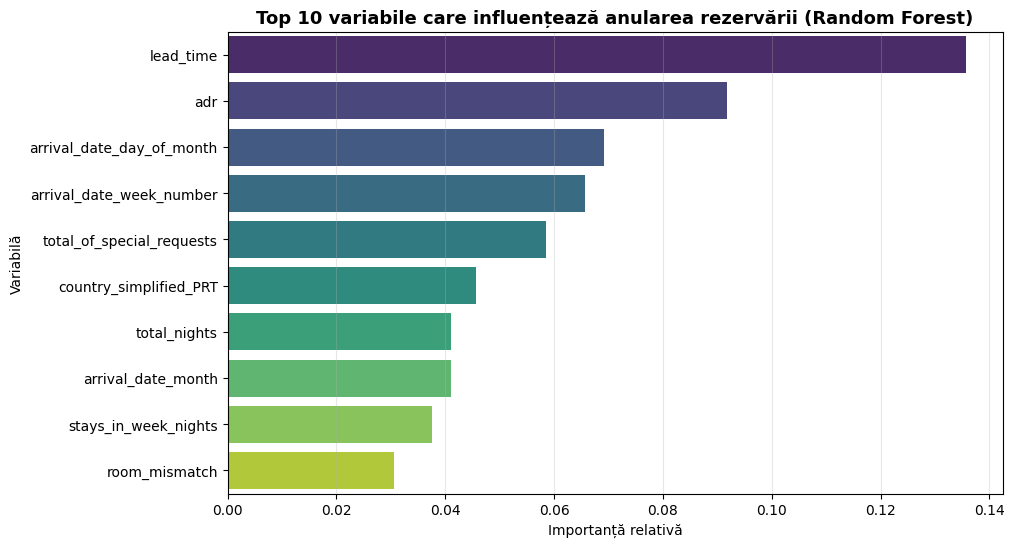

In [224]:
# Importanța variabilelor
importances = rf_clf.feature_importances_

# Le punem într-un DataFrame pentru sortare și vizualizare
feat_imp = pd.DataFrame({
    'Variabilă': X.columns,
    'Importanță': importances
}).sort_values(by='Importanță', ascending=False)

# Afișăm top 10 variabile
print("Top 10 variabile care influențează anularea rezervării:\n")
display(feat_imp.head(10))

# Vizualizare grafică
plt.figure(figsize=(10,6))
sns.barplot(x='Importanță', y='Variabilă', data=feat_imp.head(10), palette='viridis')
plt.title("Top 10 variabile care influențează anularea rezervării (Random Forest)", fontsize=13, weight='bold')
plt.xlabel("Importanță relativă")
plt.ylabel("Variabilă")
plt.grid(axis='x', alpha=0.3)
plt.show()

Conform Modelului Random Forest Classifier, cel mai important factor în anularea unei rezervări este lead_time, adică numărul de zile dintre momentul rezervării și data sosirii. Cu cât rezervarea este făcută mai devreme, cu atât crește probabilitatea de anulare.

De asemenea, conform variabilelor precum ADR, arrival_date_day_of_month si week_number, se poate observa faptul ca sezonalitatea are un rol semnificativ

## **2. Logistic Regression cu variabila target 'is_canceled'**

Principiu de funcționare - Logistic Regression:

Logistic Regression estimează probabilitatea ca o observație să aparțină unei clase folosind o combinație liniară a variabilelor, transformată prin funcția sigmoid, care comprimă valorile într-un interval între 0 și 1. Modelul învață coeficienții prin minimizarea funcției log-loss, ajustându-i astfel încât predicțiile probabilistice să fie cât mai precise. Decizia finală se obține aplicând un prag (de obicei 0.5) asupra probabilității estimate.

Logistic Regression cu variabila target 'is_canceled'

Vom identifica cu ajutorul modelului factorii principali asociați cu anularea rezervărilor.

In [243]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [250]:
#selectam features si variabila tinta
df_model = pd.read_csv("/content/df_model.csv")

X = df_model.drop(columns=['is_canceled'])
y = df_model['is_canceled']

In [249]:
#impartin in subset-uri de train si test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [251]:
#Folosim standard Scaler pt a aduce variabielele la aceeasi scala numerica
scaler = StandardScaler()

# Aplicăm doar pe setul de antrenare, apoi transformăm și testul
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ÎN definirea modelului am ales ca parametri max_iter=1000 și solver='liblinear' din următoarele motive:

max_iter=1000: un număr mare de iterații pentru a ne asigura că algoritmul converge stabil, mai ales după scalare și în prezența mai multor variabile.

solver='liblinear': este un solver robust pentru probleme de clasificare binară, funcționează foarte bine cu dataseturi de dimensiune medie. În plus, este unul dintre cei mai stabili solvers pentru date tabulare.

In [252]:
# Inițializăm modelul
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Antrenăm modelul
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Validam pe date de test

Predicții pe setul de test

Folosim modelul Logistic Regression pentru a genera predicții:

predict() returnează clasa aleasă de model pentru fiecare observație (0 = rezervare onorată, 1 = anulată).
predict_proba() returnează probabilitatea estimată ca înregistrarea să aparțină clasei 1 (anulată).
Probabilitățile sunt utile pentru a evalua încrederea modelului în predicțiile sale și pentru analize ulterioare.

In [253]:
# predictii pt clasa unde le incadreaza modelul
y_pred = log_reg.predict(X_test_scaled)

In [254]:
#probabilitatea cu care inregistrarile apartin clasei 1 (rezrervare anulata)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

Combinăm într-un singur DataFrame:

valoarea reală (Actual),
predicția modelului (Predicted),
probabilitatea estimată pentru clasa 1 (Predicted_Prob).

In [255]:
# valorile reale, predicțiile și probabilitățile într-un singur DataFrame
pred_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Predicted_Prob': y_proba
})

pred_df.head(10)

,Actual,Predicted,Predicted_Prob
0,1,0,0.201011
1,0,0,0.201677
2,1,0,0.045544
3,1,1,0.647312
4,1,1,0.743124
5,0,0,0.434728
6,1,0,0.307548
7,0,0,0.008590
8,0,0,0.060210
9,1,0,0.419262


Observații:

Unele cazuri reale 1 (anulate) sunt prezise corect de model, având probabilități ridicate (ex. 0.65 sau 0.75). Acest lucru indică faptul că modelul recunoaște bine tiparele asociate anulărilor.

Cazurile reale 0 (onorate) prezintă de obicei probabilități mici (0.02–0.20), ceea ce arată că modelul este în general sigur când clasifică o rezervare drept "neanulată".

Există și câteva situații în care un caz real 1 este prezis cu 0 (ex. probabilitate ~0.20–0.30). Acestea sunt exemple în care modelul nu identifică suficient de bine riscul anulării.

Este de remarcat faptul că valorile predict_prob se distribuie rezonabil între 0 și 1, ceea ce sugerează că modelul nu este supraîncrezător și produce probabilități calibrate.

Per ansamblu, modelul prezintă un comportament coerent: probabilitățile mari sunt asociate mai ales cazurilor anulate, iar probabilitățile mici sunt asociate rezervărilor onorate, indicând o separare decentă între cele două clase.

In [256]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [257]:
# Metrici principale
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7947953685658604
ROC-AUC: 0.8496016070260483

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87     18966
           1       0.68      0.48      0.56      7203

    accuracy                           0.79     26169
   macro avg       0.75      0.70      0.71     26169
weighted avg       0.78      0.79      0.78     26169



Cu un ROC AUC de 0.85 pare ca modelul distinge bine cele 2 clase. Vedem că avem 18 mii de recorduri din clasa 0 și doar 7 mii din clasa 1 ceea ce ne confirmă ca avem de a face cu un set de date dezechilibrat.

Acuratetea nu pare foarte mică dar asta pentru că majoritatea înregistrărilor aparțin clasei 0, pe care o prezice mai bine.

Recall pentru clasa 0 (rezervări onorate) este 0.91, ceea ce înseamnă că modelul identifică corect 91% dintre rezervările care NU au fost anulate.

Este foarte ridicat și era de așteptat, deoarece clasa 0 este majoritară în setul de date.

Matricea de confuzie - date de test

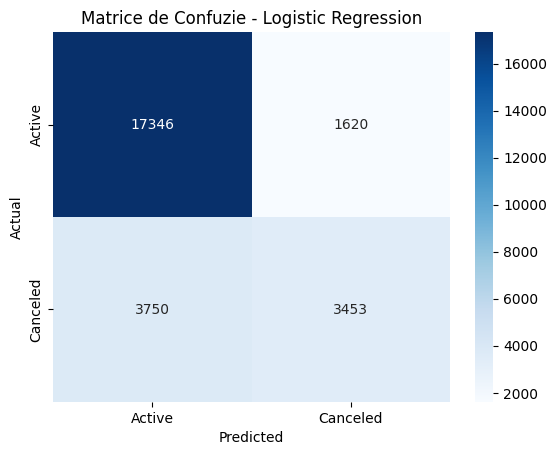

In [258]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Active', 'Canceled'], yticklabels=['Active', 'Canceled'])
plt.title("Matrice de Confuzie - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Modelul este foarte bun la a identifica clasa 0 (clasa majoritară), dar nu este la fel de bun la a identifica clasa 1 (clasa minoritară), unde ratează mai mult de jumătate din cazuri (de aici si recall de 48%).

Încercăm să vedem dacă cross-validation aduce vreo inbunătățire.

**CROSS VALIDATION**

In [259]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [260]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Folosim StratifiedKFold pentru a împărți datele în 25 de fold-uri păstrând aceeași proporție între clase ca în întregul set.

Acest lucru este esențial deoarece variabila target (is_canceled) este dezechilibrată și vrem ca fiecare subset să fie reprezentativ.

De asemenea, folosim shuffle=True și un random_state fix pentru rezultate reproductibile.

In [261]:
from sklearn.model_selection import cross_validate, StratifiedKFold
cv = StratifiedKFold(n_splits=25, shuffle=True, random_state=42)

Aplicăm validarea încrucișată pe modelul Logistic Regression, evaluând fiecare fold pe cinci metrici diferite:

- accuracy
- ROC-AUC
- F1-score
- recall
- precision

Acest tip de evaluare ne oferă o perspectivă mai completă asupra performanței modelului, nu doar o singură măsură.

In [262]:
cv_results = cross_validate(
    log_reg,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'f1', 'recall', 'precision'],
    verbose=0
)

In [263]:
print("Rezultatele Cross-Validation (mean):")
for metric in ['test_accuracy', 'test_roc_auc', 'test_f1', 'test_recall', 'test_precision']:
    print(f"{metric}: {cv_results[metric].mean():.3f}")

Rezultatele Cross-Validation (mean):
test_accuracy: 0.791
test_roc_auc: 0.843
test_f1: 0.554
test_recall: 0.472
test_precision: 0.671


Rezultatele Cross-Validation (mean)

- test_accuracy: 0.791 – modelul clasifică corect aproximativ 79% din instanțe.
- test_roc_auc: 0.843 – modelul separă bine clasele.
- test_f1: 0.553 – echilibrul între precizie și recall este moderat, potrivit pentru un set dezechilibrat.
- test_recall: 0.471 – modelul identifică doar ~47% dintre anulările reale (clasa 1).
- test_precision: 0.670 – atunci când prezice anulare, modelul are dreptate în 67% dintre cazuri.

Per ansamblu, modelul este stabil și performant pe clasele majoritare, dar încă limitează detecția completă a anulărilor (recall scăzut).

In [264]:
#antrenare finala
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Validare pe setul de test

In [265]:
#Predictii pe date de test
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [266]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


Calculăm acuratețea, precizia, recall-ul, scorul F1 și ROC-AUC folosind predicțiile obținute pe setul de test.

Scopul este să vedem cât de bine generalizează modelul în afara datelor de antrenament.

In [267]:
# Calculăm metricile principale
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\nPerformanța modelului Logistic Regression pe setul de test:")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Performanța modelului Logistic Regression pe setul de test:
Accuracy:  0.795
Precision: 0.677
Recall:    0.487
F1-score:  0.566
ROC-AUC:   0.850

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87     12644
           1       0.68      0.49      0.57      4802

    accuracy                           0.79     17446
   macro avg       0.75      0.70      0.72     17446
weighted avg       0.78      0.79      0.78     17446



Acuratetea este putin mai mare insa scorul f1 inca nu este bun, ceea ce inseamna ca modelul are probleme in a prezice clasa 1.

Diferențele mari între clase confirmă un dezechilibru de date — clasa 0 domină setul, iar modelul tinde să o favorizeze.

Matricea de confuzie (date de test, dupa CV)

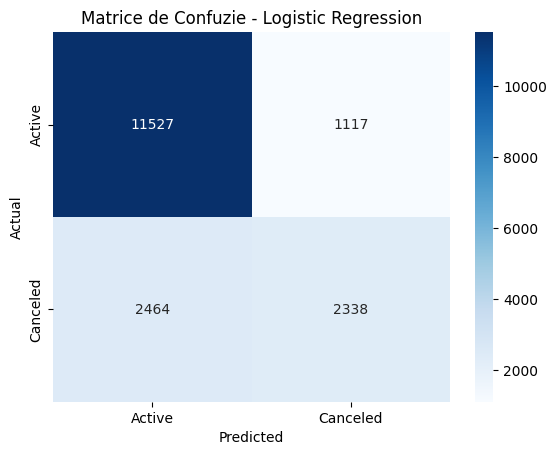

In [268]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Active', 'Canceled'], yticklabels=['Active', 'Canceled'])
plt.title("Matrice de Confuzie - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Matricea de confuzie ne arată distribuția exactă a predicțiilor modelului:

- Modelul prezice corect foarte multe cazuri din clasa 0 (majoritară).
- În schimb, pentru clasa 1 (anulate):
-- 2336 sunt prezise corect
-- 2466 sunt greșite (modelul a prezis 'onorată' când era de fapt 'anulată')

Acest lucru indică un bias puternic spre clasa majoritară. Pare că modelul ghicește clasa 1.

Aplicam SMOTE - creează exemple sintetice pentru clasa minoritară

SMOTE aplicat doar pe TRAIN

Aplicat si pe test ar putea introcuce exemple sintetice pe care deja le "cunoaste"

In [270]:
# Copie pentru modelul Logistic Regression
df_model_lr = df_model.copy()

In [271]:
X = df_model_lr.drop(columns=['is_canceled'])
y = df_model_lr['is_canceled']

Aplicăm SMOTE și apoi vedem distribuția claselor.

In [272]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Împărțim setul inițial
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Aplicăm SMOTE doar pe setul de train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Verificăm distribuțiile
print("Distribuție inițială (train):")
print(y_train.value_counts(normalize=True).round(2))

print("\nDistribuție după SMOTE (train):")
print(pd.Series(y_train_smote).value_counts(normalize=True).round(2))


Distribuție inițială (train):
is_canceled
0    0.72
1    0.28
Name: proportion, dtype: float64

Distribuție după SMOTE (train):
is_canceled
0    0.5
1    0.5
Name: proportion, dtype: float64


In [273]:
#Standardizam
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [274]:
#reantrenam modelul
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

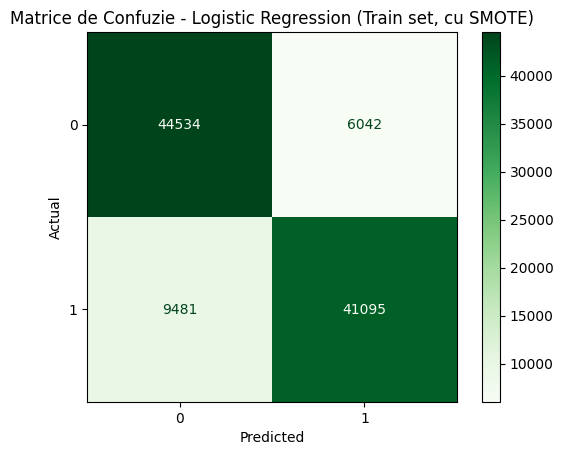

 Rezultate model pe TRAIN:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     50576
           1       0.87      0.81      0.84     50576

    accuracy                           0.85    101152
   macro avg       0.85      0.85      0.85    101152
weighted avg       0.85      0.85      0.85    101152



In [275]:
#Evaluare
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predicții pe setul de train
y_train_pred = log_reg.predict(X_train_scaled)

# Matrice de confuzie
cm_train = confusion_matrix(y_train_smote, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["0", "1"])
disp.plot(cmap="Greens")
plt.title("Matrice de Confuzie - Logistic Regression (Train set, cu SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Raport metrici train
print(" Rezultate model pe TRAIN:")
print(classification_report(y_train_smote, y_train_pred, target_names=["0", "1"]))

Aplicarea SMOTE a îmbunătățit semnificativ capacitatea modelului Logistic Regression de a învăța clasa minoritară (rezervările anulate). Performanțele pe setul de antrenare sunt echilibrate, cu un F1-score de ~0.84 atât pentru clasa 0, cât și pentru clasa 1.

Acest lucru arată că modelul reușește acum să recunoască mult mai bine anulările, fără a pierde acuratețe pentru clasa neanulată. Următorul pas este evaluarea pe setul de test pentru a verifica dacă această îmbunătățire se menține și în generalizare.

Validare pe date de test

In [276]:
# Predicții pe test
y_test_pred = log_reg.predict(X_test_scaled)

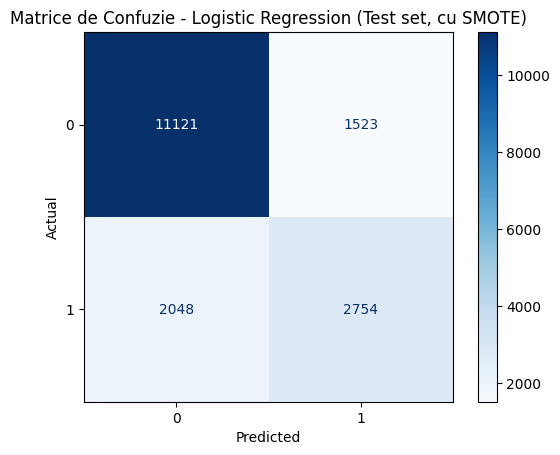

 Rezultate model pe TEST:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     12644
           1       0.64      0.57      0.61      4802

    accuracy                           0.80     17446
   macro avg       0.74      0.73      0.73     17446
weighted avg       0.79      0.80      0.79     17446



In [277]:
# Matrice de confuzie
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["0", "1"])
disp.plot(cmap="Blues")
plt.title("Matrice de Confuzie - Logistic Regression (Test set, cu SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Raport metrici test
print(" Rezultate model pe TEST:")
print(classification_report(y_test, y_test_pred, target_names=["0", "1"]))

Pe setul de test, modelul Logistic Regression antrenat cu SMOTE performează mai bine decât varianta fără SMOTE în ceea ce privește identificarea rezervărilor anulate (clasa 1). Recall-ul clasei 1 crește semnificativ (0.48 → 0.61), iar F1-score urcă la 0.62, ceea ce arată că modelul reușește să surprindă mai bine tiparele clasei minoritare.

Totuși, fiindcă setul de test rămâne puternic dezechilibrat (SMOTE aplicat doar pe train), performanța nu ajunge la nivelul observat pe setul de train, unde SMOTE oferise un echilibru artificial. Acuratețea generală rămâne la 0.79, iar modelul continuă să se descurce mult mai bine pe clasa majoritară.

Per ansamblu, SMOTE a avut un efect pozitiv și a îmbunătățit clar abilitatea modelului de a identifica anulările reale.

CURBA ROC AUC

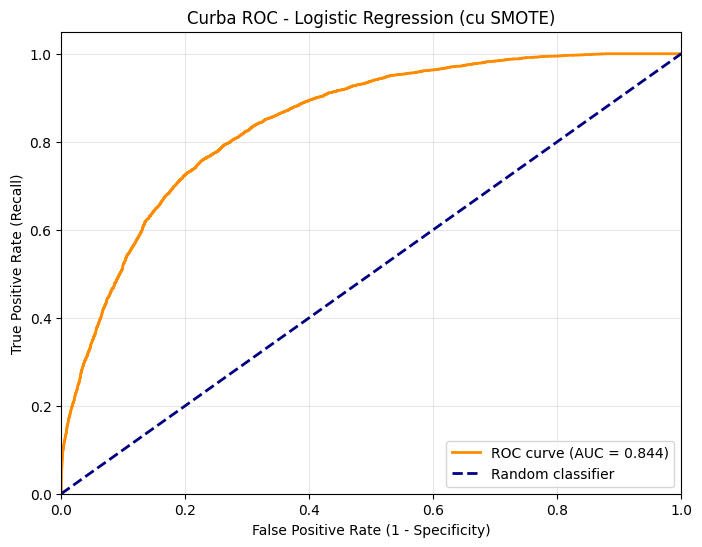

 AUC Score: 0.844


In [278]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obținem probabilitățile de predicție pentru clasa "1" (Canceled)
y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculăm punctele pentru curba ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Curba ROC - Logistic Regression (cu SMOTE)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f" AUC Score: {roc_auc:.3f}")


Curba ROC arată că Logistic Regression antrenat cu SMOTE are o capacitate bună de separare între rezervările anulate și cele neanulate, AUC-ul de 0.844 confirmând un model robust. Deși recall-ul pe clasa minoritară rămâne limitat de dezechilibrul natural al setului de test, modelul reușește să genereze scoruri de probabilitate bine ordonate și consistente.

## **3. CNN 1D (Convolutional Neural Network) - Estimarea tarifului mediu zilnic (ADR)**

Principiu de funcționare - CNN 1D (Convolutional Neural Network):

Un model CNN 1D este o rețea neuronală bazată pe operații de convoluție, specializată în captarea tiparelor locale și a relațiilor secvențiale din date unidimensionale — cum sunt seriile temporale, semnalele sau secvențele ordonate de valori.

Modelul aplică filtre (kernel-uri) care “scanează” datele pe lungimea secvenței și extrag automat caracteristici relevante, precum variații, tendințe sau structuri repetitive.
Prin stratificarea mai multor filtre, CNN-ul învață reprezentări din ce în ce mai abstracte ale datelor (de la modele locale simple până la relații complexe între perioade).

Ulterior, straturile de Pooling reduc dimensionalitatea și păstrează doar informațiile importante, iar straturile Dense de la final combină aceste caracteristici pentru a realiza clasificarea.

Scopul acestui model este estimarea tarifului mediu zilnic (ADR).

Arhitectura include straturi convoluționale și de pooling pentru a extrage patternuri între caracteristici (de exemplu, cum se leagă lead_time de adr și total_nights).

In [225]:
#Import și citire fișier df_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

In [229]:
df = pd.read_csv("/content/df_model.csv")
print(f"Dimensiune dataset: {df_model.shape}")
df.head()

Dimensiune dataset: (87229, 60)


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_Other,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_Other,has_agent
0,0,342,2015,7,27,1,0,0,2,0.0,...,False,False,False,True,False,False,False,False,True,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,False,False,False,True,False,False,False,False,True,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,False,False,False,False,False,False,False,False,True,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,False,False,False,False,False,False,False,False,False,1
4,0,14,2015,7,27,1,0,2,2,0.0,...,False,False,False,False,False,False,False,False,False,1


Selectarea variabilelor relevante

Valori lipsă:
 lead_time                      0
total_nights                   0
arrival_date_month             0
total_of_special_requests      0
hotel_encoded                  0
total_guests                   0
required_car_parking_spaces    0
adr                            0
dtype: int64

Statistici numerice:


,count,mean,std,min,25%,50%,75%,max
lead_time,87229.0,79.969700,86.058295,0.0,11.00,49.0,125.0,737.0
total_nights,87229.0,3.628461,2.742879,0.0,2.00,3.0,5.0,69.0
arrival_date_month,87229.0,6.474945,3.096473,1.0,4.00,7.0,9.0,12.0
total_of_special_requests,87229.0,0.698942,0.832052,0.0,0.00,0.0,1.0,5.0
hotel_encoded,87229.0,0.389263,0.487586,0.0,0.00,0.0,1.0,1.0
total_guests,87229.0,2.029107,0.790146,1.0,2.00,2.0,2.0,55.0
required_car_parking_spaces,87229.0,0.084307,0.281660,0.0,0.00,0.0,0.0,8.0
adr,87229.0,106.519325,54.890211,0.0,72.25,98.2,134.1,5400.0


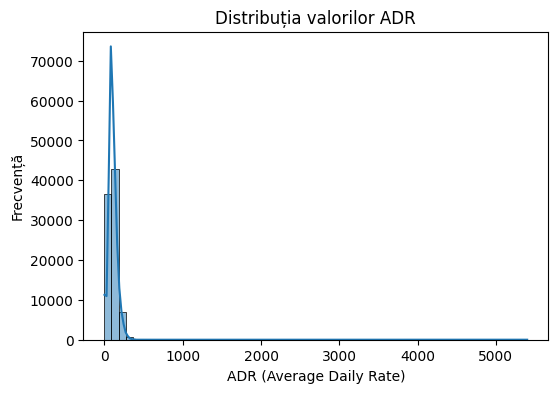

In [230]:
df = df.drop(columns=['is_canceled'], errors='ignore')

# Selectăm variabilele relevante
features = [
    'lead_time', 'total_nights', 'arrival_date_month',
    'total_of_special_requests', 'hotel_encoded',
    'total_guests', 'required_car_parking_spaces'
]
target = 'adr'

df_model = df[features + [target]].copy()

# Verificăm dacă există valori lipsă
print("Valori lipsă:\n", df_model.isnull().sum())

# Statistici descriptive
print("\nStatistici numerice:")
display(df_model.describe().T)

# Distribuția ADR
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df_model['adr'], bins=60, kde=True)
plt.title("Distribuția valorilor ADR")
plt.xlabel("ADR (Average Daily Rate)")
plt.ylabel("Frecvență")
plt.show()


Split + scalare + reshaping pentru CNN 1D

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separăm X și y
X = df_model[features]
y = df_model[target]

# Împărțim în train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scalăm datele numerice
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Remodelăm pentru CNN 1D
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

print("Forme după pregătire:")
print("X_train_cnn:", X_train_cnn.shape)
print("X_test_cnn:", X_test_cnn.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Forme după pregătire:
X_train_cnn: (61060, 7, 1)
X_test_cnn: (26169, 7, 1)
y_train: (61060,)
y_test: (26169,)


Definirea arhitecturii CNN 1D

Construim o rețea neuronală cu straturi Conv1D care să învețe patternuri între caracteristicile numerice (lead time, total_nights etc.).

Vom adăuga și straturi de MaxPooling și Dropout pentru generalizare.

În final, un strat Dense(1) pentru predicția valorii ADR (regresie).

In [233]:
# Definim arhitectura CNN
model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(7, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, activation='relu'),
    Flatten(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # ieșire continuă (regresie)
])

# Compilare
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Rezumat model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 6, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,625 (57.13 KB)

 Trainable params: 14,625 (57.13 KB)

 Non-trainable params: 0 (0.00 B)

Antrenarea modelului CNN 1D

Antrenăm modelul pe 20 de epoci.

Folosim 10% din datele de train pentru validare.

Vizualizăm curbele loss și MAE (Mean Absolute Error).

Evaluăm performanța pe setul de test.

Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 6931.0146 - mae: 63.6350 - val_loss: 2363.5505 - val_mae: 35.7656
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2556.8391 - mae: 35.5598 - val_loss: 2056.6973 - val_mae: 34.7616
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2224.7021 - mae: 34.1469 - val_loss: 1841.3772 - val_mae: 30.7306
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2261.4519 - mae: 32.4676 - val_loss: 1821.2460 - val_mae: 30.1025
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2588.9141 - mae: 31.8776 - val_loss: 1624.6355 - val_mae: 29.2680
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1903.6603 - mae: 30.9990 - val_loss: 1611.4520 - val_mae: 28.3048
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1765.9321 - mae: 30.1313 - val_loss: 1545.6282 - val_mae: 27.7966
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1724.6626 - mae: 29.6453 - val_loss: 1517.3640 - val_mae:

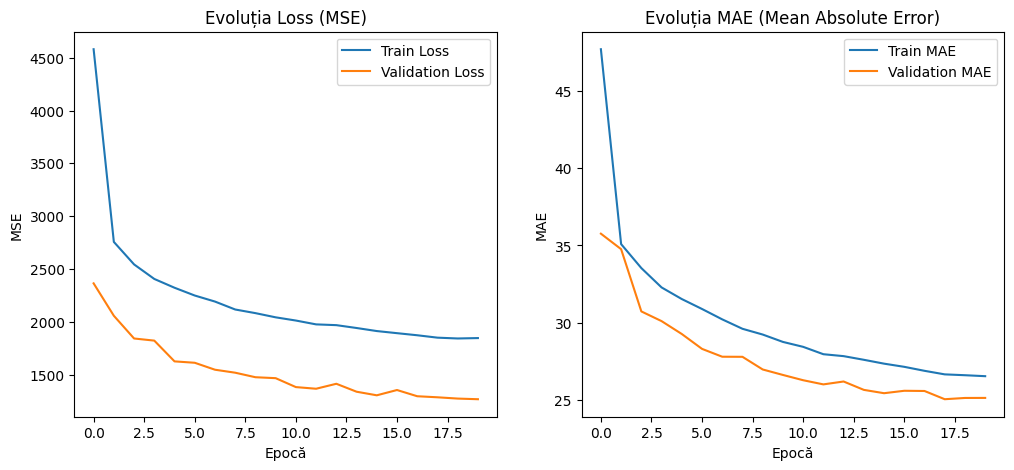

In [234]:
history = model.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Vizualizare curbe de antrenare
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Evoluția Loss (MSE)")
plt.xlabel("Epocă")
plt.ylabel("MSE")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("Evoluția MAE (Mean Absolute Error)")
plt.xlabel("Epocă")
plt.ylabel("MAE")
plt.legend()

plt.show()

Evoluția Loss (MSE):

Scade rapid în primele 5 epoci (semn că modelul învață repede patternurile principale).

Apoi continuă să scadă gradual și se stabilizează după ~15 epoci.

Val_loss < Train_loss — semn că dropout-ul a prevenit overfittingul (foarte bine).

Evoluția MAE:

Scade frumos și constant până la valori în jur de ~25–30 ADR unități.

Înseamnă că, în medie, modelul greșește cu ±25–30 unități monetare în predicția tarifului zilnic — un rezultat rezonabil pentru un model CNN fără fine-tuning.

Concluzie: Modelul este stabil, învață bine și nu suferă de overfitting.

Evaluarea pe setul de test

Calculăm MAE, RMSE și R² pe setul de test.

Vizualizăm o comparație între valorile reale (y_test) și prezise (y_pred) pentru a evalua cât de bine urmează linia ideală.

818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
 Rezultate pe setul de test:
MAE  (Mean Absolute Error): 24.83
RMSE (Root Mean Squared Error): 34.70
R²   (R-squared): 0.554


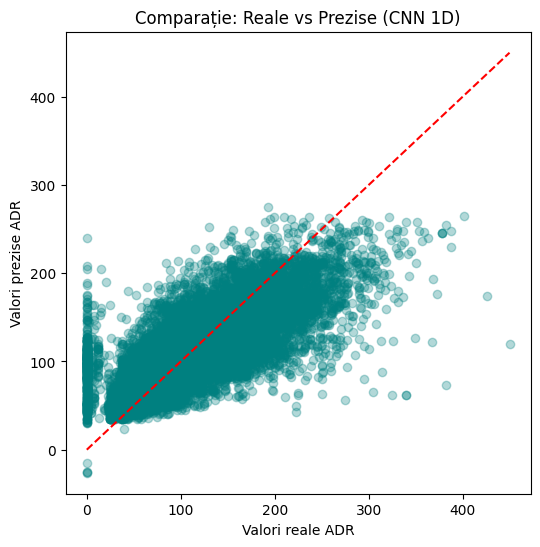

In [235]:
# Predicții pe test
y_pred = model.predict(X_test_cnn)

# Metrici
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Rezultate pe setul de test:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (R-squared): {r2:.3f}")

# Grafic comparație valori reale vs prezise
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Valori reale ADR")
plt.ylabel("Valori prezise ADR")
plt.title("Comparație: Reale vs Prezise (CNN 1D)")
plt.show()

Pentru valorile mari de ADR, modelul subestimează, iar pentru cele foarte mici supraestimează ușor. Asta se întâmplă fiindcă setul are multe rezervări anulate sau foarte ieftine, care distorsionează relațiile numerice învățate

Urmeaza sa filtram rezervarile anulate pentru a obtine un rezultat mai bun

Filtrarea rezervărilor anulate (is_canceled = 0)

Pentru o predicție realistă a tarifului zilnic, trebuie să folosim doar rezervările onorate

In [237]:
df_full = pd.read_csv("df_model.csv")

# Filtrăm doar rezervările onorate
df_filtered = df_full[df_full["is_canceled"] == 0]

# Refacem subsetul cu variabilele relevante
features = [
    'lead_time', 'total_nights', 'arrival_date_month',
    'total_of_special_requests', 'hotel_encoded',
    'total_guests', 'required_car_parking_spaces'
]
target = 'adr'

df_model = df_filtered[features + [target]].copy()
print("După filtrare:", df_model.shape)

# Split + scalare
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

print("Forme noi:", X_train_cnn.shape, X_test_cnn.shape)

După filtrare: (63220, 8)
Forme noi: (50576, 7, 1) (12644, 7, 1)


Optimizarea hiperparametrilor (Grid Search simplificat)

Vom testa mai multe combinații de parametri pentru a găsi arhitectura cea mai performantă:

număr de filtre (32, 64)

mărimea kernelului (2, 3)

rata dropout (0.2, 0.3)

batch size (64, 128)

In [238]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.8 MB/s eta 0:00:00


In [239]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Input(shape=(7,1)))

    # Caută automat numărul de filtre și mărimea kernelului
    model.add(layers.Conv1D(
        filters=hp.Choice('filters', values=[32, 64, 128]),
        kernel_size=hp.Choice('kernel_size', values=[2, 3]),
        activation='relu'
    ))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3])))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Choice('dense_units', values=[32, 64, 128]),
        activation='relu'
    ))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model

# Inițializăm tuner-ul
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,   # poți crește la 10 pentru rezultate mai bune
    executions_per_trial=1,
    overwrite=True,
    directory='tuning_dir',
    project_name='cnn_adr_tuning'
)

# Căutare hiperparametri
tuner.search(X_train_cnn, y_train, epochs=10, validation_split=0.1, batch_size=128, verbose=1)

# Afișăm cei mai buni hiperparametri
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f" Cei mai buni parametri găsiți:")
print(f"Filters: {best_hps.get('filters')}")
print(f"Kernel size: {best_hps.get('kernel_size')}")
print(f"Dropout rate: {best_hps.get('dropout_rate')}")
print(f"Dense units: {best_hps.get('dense_units')}")

Trial 5 Complete [00h 00m 29s]
val_mae: 28.204666137695312

Best val_mae So Far: 27.25179100036621
Total elapsed time: 00h 02m 19s
 Cei mai buni parametri găsiți:
Filters: 64
Kernel size: 3
Dropout rate: 0.3
Dense units: 128


Valoarea val_mae ≈ 27 înseamnă:

în medie, modelul greșește cu ±27 unități în predicția ADR. (de exemplu, dacă o cameră are 120, modelul o estimează în jur de 95–145)

Vom implementa o versiune custom grid search care:

Creează același CNN 1D (cu parametrii buni găsiți anterior: filters=128, kernel=3, dropout=0.3, dense=128).

Variează learning rate, batch size, și epochs conform grilei propuse.

Măsoară performanța pe validation MAE pentru fiecare combinație.

Afișează cea mai bună combinație + grafic comparativ.

In [240]:
from tensorflow.keras.optimizers import Adam
import itertools
import time

# Grila de parametri
param_grid = {
    "learning_rate": [1e-3, 1e-4, 1e-5],
    "batch_size": [16, 32, 64],
    "epochs": [20, 50]
}

# Combinăm toate variantele posibile
combinations = list(itertools.product(
    param_grid["learning_rate"],
    param_grid["batch_size"],
    param_grid["epochs"]
))

results = []

for lr, batch, ep in combinations:
    print(f"\n Testing combination: lr={lr}, batch={batch}, epochs={ep}")

    # definim modelul CNN 1D cu cei mai buni parametri arhitecturali anteriori
    model = Sequential([
        Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(7,1)),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae'])

    start = time.time()
    history = model.fit(
        X_train_cnn, y_train,
        epochs=ep,
        batch_size=batch,
        validation_split=0.1,
        verbose=2
    )
    duration = time.time() - start

    val_mae = history.history['val_mae'][-1]
    print(f" Done. val_mae={val_mae:.3f} in {duration/60:.1f} min")

    results.append({
        "learning_rate": lr,
        "batch_size": batch,
        "epochs": ep,
        "val_mae": val_mae,
        "train_mae": history.history['mae'][-1],
        "duration_min": round(duration/60, 1)
    })

# Rezultate
results_df = pd.DataFrame(results).sort_values(by="val_mae")
print("\n Rezumat rezultate:")
display(results_df)

best = results_df.iloc[0]
print(f"\n Cea mai bună combinație:")
print(best)


 Testing combination: lr=0.001, batch=16, epochs=20
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2845/2845 - 17s - 6ms/step - loss: 2358.6470 - mae: 36.2261 - val_loss: 1727.1914 - val_mae: 30.2334
Epoch 2/20
2845/2845 - 8s - 3ms/step - loss: 1746.2711 - mae: 30.9525 - val_loss: 1563.3441 - val_mae: 28.4416
Epoch 3/20
2845/2845 - 9s - 3ms/step - loss: 1622.8291 - mae: 29.6655 - val_loss: 1512.9514 - val_mae: 27.6774
Epoch 4/20
2845/2845 - 8s - 3ms/step - loss: 1556.8844 - mae: 28.9278 - val_loss: 1460.2213 - val_mae: 27.8546
Epoch 5/20
2845/2845 - 8s - 3ms/step - loss: 1505.1401 - mae: 28.3302 - val_loss: 1397.4520 - val_mae: 26.8002
Epoch 6/20
2845/2845 - 9s - 3ms/step - loss: 1465.7332 - mae: 27.8997 - val_loss: 1370.7756 - val_mae: 26.3243
Epoch 7/20
2845/2845 - 8s - 3ms/step - loss: 1439.8220 - mae: 27.5478 - val_loss: 1357.5435 - val_mae: 26.3313
Epoch 8/20
2845/2845 - 9s - 3ms/step - loss: 1415.7375 - mae: 27.2917 - val_loss: 1349.4324 - val_mae: 26.2642
Epoch 9/20
2845/2845 - 9s - 3ms/step - loss: 1400.4783 - mae: 27.0764 - val_loss: 1331.8406 - val_mae: 25.6513
Epoch 10/20

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2845/2845 - 10s - 3ms/step - loss: 2336.9451 - mae: 36.0934 - val_loss: 1718.6598 - val_mae: 30.5466
Epoch 2/50
2845/2845 - 8s - 3ms/step - loss: 1747.5745 - mae: 30.9405 - val_loss: 1570.6703 - val_mae: 28.9806
Epoch 3/50
2845/2845 - 9s - 3ms/step - loss: 1607.6940 - mae: 29.4947 - val_loss: 1470.0798 - val_mae: 27.6078
Epoch 4/50
2845/2845 - 9s - 3ms/step - loss: 1530.7446 - mae: 28.6067 - val_loss: 1409.4166 - val_mae: 26.8189
Epoch 5/50
2845/2845 - 9s - 3ms/step - loss: 1485.3108 - mae: 28.0778 - val_loss: 1377.4890 - val_mae: 26.3669
Epoch 6/50
2845/2845 - 8s - 3ms/step - loss: 1456.9043 - mae: 27.7198 - val_loss: 1351.7506 - val_mae: 26.0018
Epoch 7/50
2845/2845 - 8s - 3ms/step - loss: 1425.2626 - mae: 27.4847 - val_loss: 1341.3639 - val_mae: 25.7622
Epoch 8/50
2845/2845 - 8s - 3ms/step - loss: 1403.9620 - mae: 27.1674 - val_loss: 1345.9371 - val_mae: 26.4561
Epoch 9/50
2845/2845 - 8s - 3ms/step - loss: 1383.6812 - mae: 26.9985 - val_loss: 1359.2797 - val_mae: 26.8785
Epoch 10/50

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1423/1423 - 6s - 4ms/step - loss: 2690.8340 - mae: 38.8420 - val_loss: 1793.3663 - val_mae: 30.6567
Epoch 2/20
1423/1423 - 5s - 4ms/step - loss: 1796.4324 - mae: 31.5039 - val_loss: 1667.0435 - val_mae: 30.2646
Epoch 3/20
1423/1423 - 4s - 3ms/step - loss: 1682.1400 - mae: 30.3179 - val_loss: 1541.8347 - val_mae: 28.6646
Epoch 4/20
1423/1423 - 5s - 3ms/step - loss: 1597.3033 - mae: 29.3337 - val_loss: 1452.1646 - val_mae: 27.3694
Epoch 5/20
1423/1423 - 5s - 3ms/step - loss: 1533.7529 - mae: 28.6122 - val_loss: 1414.1543 - val_mae: 26.8609
Epoch 6/20
1423/1423 - 4s - 3ms/step - loss: 1490.0677 - mae: 28.1491 - val_loss: 1382.8868 - val_mae: 26.4894
Epoch 7/20
1423/1423 - 5s - 4ms/step - loss: 1471.5413 - mae: 27.9021 - val_loss: 1373.2675 - val_mae: 26.4517
Epoch 8/20
1423/1423 - 5s - 3ms/step - loss: 1445.0488 - mae: 27.6287 - val_loss: 1393.3245 - val_mae: 27.0251
Epoch 9/20
1423/1423 - 5s - 3ms/step - loss: 1428.6677 - mae: 27.4321 - val_loss: 1338.8442 - val_mae: 25.9214
Epoch 10/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1423/1423 - 6s - 4ms/step - loss: 2750.4995 - mae: 39.1916 - val_loss: 1851.6107 - val_mae: 31.8136
Epoch 2/50
1423/1423 - 5s - 4ms/step - loss: 1840.2533 - mae: 31.9316 - val_loss: 1738.0186 - val_mae: 31.1937
Epoch 3/50
1423/1423 - 4s - 3ms/step - loss: 1717.4854 - mae: 30.7056 - val_loss: 1582.5934 - val_mae: 29.1387
Epoch 4/50
1423/1423 - 4s - 3ms/step - loss: 1627.2378 - mae: 29.6113 - val_loss: 1486.9539 - val_mae: 27.6883
Epoch 5/50
1423/1423 - 5s - 4ms/step - loss: 1562.2543 - mae: 28.9728 - val_loss: 1435.9586 - val_mae: 27.2774
Epoch 6/50
1423/1423 - 4s - 3ms/step - loss: 1531.5616 - mae: 28.5462 - val_loss: 1454.4873 - val_mae: 27.9301
Epoch 7/50
1423/1423 - 5s - 3ms/step - loss: 1488.8604 - mae: 28.0682 - val_loss: 1386.0933 - val_mae: 26.6738
Epoch 8/50
1423/1423 - 5s - 4ms/step - loss: 1462.2119 - mae: 27.7783 - val_loss: 1395.2622 - val_mae: 26.2218
Epoch 9/50
1423/1423 - 4s - 3ms/step - loss: 1431.8481 - mae: 27.4633 - val_loss: 1355.3859 - val_mae: 26.1818
Epoch 10/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



712/712 - 4s - 6ms/step - loss: 3332.8083 - mae: 43.4368 - val_loss: 2066.5244 - val_mae: 33.8474
Epoch 2/20
712/712 - 4s - 6ms/step - loss: 1913.5958 - mae: 32.5609 - val_loss: 1764.7683 - val_mae: 31.0794
Epoch 3/20
712/712 - 3s - 4ms/step - loss: 1784.3002 - mae: 31.3845 - val_loss: 1641.7761 - val_mae: 29.4462
Epoch 4/20
712/712 - 3s - 4ms/step - loss: 1722.2444 - mae: 30.6150 - val_loss: 1589.7997 - val_mae: 29.0836
Epoch 5/20
712/712 - 3s - 4ms/step - loss: 1663.2528 - mae: 30.0491 - val_loss: 1531.6354 - val_mae: 28.2874
Epoch 6/20
712/712 - 4s - 6ms/step - loss: 1606.4563 - mae: 29.4498 - val_loss: 1504.7737 - val_mae: 28.0869
Epoch 7/20
712/712 - 3s - 4ms/step - loss: 1581.6074 - mae: 29.1453 - val_loss: 1472.3986 - val_mae: 27.7699
Epoch 8/20
712/712 - 3s - 4ms/step - loss: 1543.3534 - mae: 28.7707 - val_loss: 1432.1600 - val_mae: 27.0793
Epoch 9/20
712/712 - 3s - 4ms/step - loss: 1519.1764 - mae: 28.4864 - val_loss: 1418.2910 - val_mae: 27.0113
Epoch 10/20
712/712 - 4s - 5ms

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



712/712 - 5s - 7ms/step - loss: 3403.0950 - mae: 44.0855 - val_loss: 2172.6907 - val_mae: 34.9935
Epoch 2/50
712/712 - 3s - 5ms/step - loss: 1973.4906 - mae: 33.1690 - val_loss: 1764.8864 - val_mae: 30.7635
Epoch 3/50
712/712 - 3s - 4ms/step - loss: 1808.1210 - mae: 31.5952 - val_loss: 1659.2078 - val_mae: 29.5112
Epoch 4/50
712/712 - 3s - 4ms/step - loss: 1699.4924 - mae: 30.4407 - val_loss: 1559.0651 - val_mae: 28.4969
Epoch 5/50
712/712 - 3s - 5ms/step - loss: 1620.5930 - mae: 29.5423 - val_loss: 1498.4796 - val_mae: 27.9482
Epoch 6/50
712/712 - 4s - 5ms/step - loss: 1578.6368 - mae: 29.0772 - val_loss: 1451.2307 - val_mae: 27.2280
Epoch 7/50
712/712 - 3s - 4ms/step - loss: 1528.0676 - mae: 28.5990 - val_loss: 1422.2642 - val_mae: 26.8939
Epoch 8/50
712/712 - 3s - 4ms/step - loss: 1493.6586 - mae: 28.2223 - val_loss: 1407.1208 - val_mae: 26.8014
Epoch 9/50
712/712 - 3s - 5ms/step - loss: 1472.1737 - mae: 27.8533 - val_loss: 1404.9832 - val_mae: 26.9500
Epoch 10/50
712/712 - 4s - 5ms

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2845/2845 - 10s - 3ms/step - loss: 4531.2144 - mae: 51.5398 - val_loss: 2689.0110 - val_mae: 39.9391
Epoch 2/20
2845/2845 - 9s - 3ms/step - loss: 2481.3682 - mae: 38.0112 - val_loss: 2291.2065 - val_mae: 36.2383
Epoch 3/20
2845/2845 - 8s - 3ms/step - loss: 2171.5581 - mae: 35.1568 - val_loss: 2015.3820 - val_mae: 33.1900
Epoch 4/20
2845/2845 - 8s - 3ms/step - loss: 1988.0591 - mae: 33.2768 - val_loss: 1859.6888 - val_mae: 31.6109
Epoch 5/20
2845/2845 - 10s - 4ms/step - loss: 1881.0867 - mae: 32.3315 - val_loss: 1790.2355 - val_mae: 31.0967
Epoch 6/20
2845/2845 - 7s - 3ms/step - loss: 1841.7048 - mae: 31.8418 - val_loss: 1742.3118 - val_mae: 30.6340
Epoch 7/20
2845/2845 - 8s - 3ms/step - loss: 1810.1633 - mae: 31.6021 - val_loss: 1701.9082 - val_mae: 30.0444
Epoch 8/20
2845/2845 - 8s - 3ms/step - loss: 1779.4042 - mae: 31.3219 - val_loss: 1680.3600 - val_mae: 29.9700
Epoch 9/20
2845/2845 - 8s - 3ms/step - loss: 1761.5647 - mae: 31.0768 - val_loss: 1653.4595 - val_mae: 29.5772
Epoch 10/2

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2845/2845 - 10s - 3ms/step - loss: 4533.7690 - mae: 51.3370 - val_loss: 2703.0742 - val_mae: 39.8888
Epoch 2/50
2845/2845 - 9s - 3ms/step - loss: 2493.1228 - mae: 38.0570 - val_loss: 2314.1943 - val_mae: 36.5594
Epoch 3/50
2845/2845 - 8s - 3ms/step - loss: 2171.0754 - mae: 35.1686 - val_loss: 2003.3074 - val_mae: 33.3546
Epoch 4/50
2845/2845 - 8s - 3ms/step - loss: 1987.1544 - mae: 33.3460 - val_loss: 1850.5261 - val_mae: 31.5714
Epoch 5/50
2845/2845 - 8s - 3ms/step - loss: 1893.2505 - mae: 32.3497 - val_loss: 1792.0453 - val_mae: 31.0749
Epoch 6/50
2845/2845 - 9s - 3ms/step - loss: 1850.1793 - mae: 32.0346 - val_loss: 1763.5621 - val_mae: 30.8817
Epoch 7/50
2845/2845 - 9s - 3ms/step - loss: 1821.5527 - mae: 31.7238 - val_loss: 1723.8776 - val_mae: 30.3725
Epoch 8/50
2845/2845 - 9s - 3ms/step - loss: 1799.8269 - mae: 31.4452 - val_loss: 1698.7491 - val_mae: 30.0545
Epoch 9/50
2845/2845 - 8s - 3ms/step - loss: 1782.6776 - mae: 31.2773 - val_loss: 1677.1206 - val_mae: 29.8243
Epoch 10/50

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1423/1423 - 6s - 5ms/step - loss: 6175.1387 - mae: 61.8136 - val_loss: 3094.9912 - val_mae: 43.0269
Epoch 2/20
1423/1423 - 4s - 3ms/step - loss: 2865.2915 - mae: 41.1244 - val_loss: 2624.0156 - val_mae: 39.2387
Epoch 3/20
1423/1423 - 5s - 4ms/step - loss: 2512.1299 - mae: 38.2099 - val_loss: 2363.0361 - val_mae: 36.8462
Epoch 4/20
1423/1423 - 4s - 3ms/step - loss: 2276.4731 - mae: 36.1652 - val_loss: 2130.0540 - val_mae: 34.4716
Epoch 5/20
1423/1423 - 4s - 3ms/step - loss: 2084.4126 - mae: 34.2288 - val_loss: 1954.2487 - val_mae: 32.7631
Epoch 6/20
1423/1423 - 5s - 4ms/step - loss: 1967.2440 - mae: 33.1583 - val_loss: 1852.9282 - val_mae: 31.6594
Epoch 7/20
1423/1423 - 4s - 3ms/step - loss: 1905.7041 - mae: 32.5184 - val_loss: 1802.5259 - val_mae: 31.1851
Epoch 8/20
1423/1423 - 4s - 3ms/step - loss: 1866.6848 - mae: 32.1246 - val_loss: 1766.3405 - val_mae: 30.7790
Epoch 9/20
1423/1423 - 5s - 4ms/step - loss: 1837.5370 - mae: 31.8779 - val_loss: 1738.3088 - val_mae: 30.4329
Epoch 10/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1423/1423 - 6s - 4ms/step - loss: 6350.1602 - mae: 63.0165 - val_loss: 3172.0811 - val_mae: 43.7675
Epoch 2/50
1423/1423 - 5s - 4ms/step - loss: 2922.1980 - mae: 41.6950 - val_loss: 2650.8958 - val_mae: 39.5325
Epoch 3/50
1423/1423 - 5s - 3ms/step - loss: 2508.7112 - mae: 38.2402 - val_loss: 2352.7817 - val_mae: 36.8953
Epoch 4/50
1423/1423 - 5s - 3ms/step - loss: 2258.0576 - mae: 36.0255 - val_loss: 2113.7258 - val_mae: 34.4377
Epoch 5/50
1423/1423 - 6s - 4ms/step - loss: 2071.5496 - mae: 34.1845 - val_loss: 1931.8531 - val_mae: 32.5146
Epoch 6/50
1423/1423 - 5s - 3ms/step - loss: 1956.6127 - mae: 33.0423 - val_loss: 1830.1036 - val_mae: 31.4422
Epoch 7/50
1423/1423 - 5s - 3ms/step - loss: 1887.1631 - mae: 32.3255 - val_loss: 1773.0012 - val_mae: 30.7837
Epoch 8/50
1423/1423 - 5s - 4ms/step - loss: 1837.5111 - mae: 31.8686 - val_loss: 1732.0992 - val_mae: 30.2605
Epoch 9/50
1423/1423 - 4s - 3ms/step - loss: 1814.1776 - mae: 31.6034 - val_loss: 1728.1542 - val_mae: 30.5792
Epoch 10/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



712/712 - 4s - 6ms/step - loss: 8820.6113 - mae: 78.2278 - val_loss: 3688.3945 - val_mae: 46.6423
Epoch 2/20
712/712 - 4s - 6ms/step - loss: 3322.4832 - mae: 44.4798 - val_loss: 3071.3965 - val_mae: 42.9901
Epoch 3/20
712/712 - 3s - 4ms/step - loss: 2952.3003 - mae: 41.8890 - val_loss: 2778.4563 - val_mae: 40.6385
Epoch 4/20
712/712 - 3s - 4ms/step - loss: 2679.2595 - mae: 39.6636 - val_loss: 2552.3464 - val_mae: 38.6955
Epoch 5/20
712/712 - 6s - 9ms/step - loss: 2476.5703 - mae: 37.9200 - val_loss: 2379.5876 - val_mae: 36.9940
Epoch 6/20
712/712 - 3s - 4ms/step - loss: 2326.3557 - mae: 36.5983 - val_loss: 2233.8889 - val_mae: 35.6093
Epoch 7/20
712/712 - 3s - 4ms/step - loss: 2198.1934 - mae: 35.4124 - val_loss: 2095.5400 - val_mae: 34.1906
Epoch 8/20
712/712 - 3s - 4ms/step - loss: 2083.6926 - mae: 34.2470 - val_loss: 1979.3848 - val_mae: 32.9096
Epoch 9/20
712/712 - 4s - 6ms/step - loss: 2002.9166 - mae: 33.5020 - val_loss: 1903.3312 - val_mae: 32.1899
Epoch 10/20
712/712 - 4s - 6ms

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



712/712 - 5s - 7ms/step - loss: 9055.9619 - mae: 79.4365 - val_loss: 3801.2458 - val_mae: 47.0888
Epoch 2/50
712/712 - 3s - 4ms/step - loss: 3339.5637 - mae: 44.4017 - val_loss: 3064.0090 - val_mae: 42.7633
Epoch 3/50
712/712 - 3s - 4ms/step - loss: 2933.4250 - mae: 41.5986 - val_loss: 2749.8315 - val_mae: 40.2713
Epoch 4/50
712/712 - 4s - 5ms/step - loss: 2645.7278 - mae: 39.3208 - val_loss: 2509.9299 - val_mae: 38.1896
Epoch 5/50
712/712 - 3s - 5ms/step - loss: 2432.6304 - mae: 37.5152 - val_loss: 2321.3687 - val_mae: 36.4631
Epoch 6/50
712/712 - 3s - 4ms/step - loss: 2264.3882 - mae: 35.9289 - val_loss: 2152.1265 - val_mae: 34.7722
Epoch 7/50
712/712 - 3s - 4ms/step - loss: 2113.3821 - mae: 34.5086 - val_loss: 1999.4716 - val_mae: 33.0771
Epoch 8/50
712/712 - 4s - 5ms/step - loss: 2007.9772 - mae: 33.4230 - val_loss: 1902.0204 - val_mae: 32.1451
Epoch 9/50
712/712 - 3s - 5ms/step - loss: 1933.5892 - mae: 32.7067 - val_loss: 1841.1021 - val_mae: 31.5118
Epoch 10/50
712/712 - 3s - 4ms

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2845/2845 - 11s - 4ms/step - loss: 12311.0107 - mae: 98.4844 - val_loss: 10798.3828 - val_mae: 90.8508
Epoch 2/20
2845/2845 - 8s - 3ms/step - loss: 9227.0469 - mae: 81.6796 - val_loss: 6983.0723 - val_mae: 68.1398
Epoch 3/20
2845/2845 - 9s - 3ms/step - loss: 5456.3379 - mae: 58.1948 - val_loss: 4007.0454 - val_mae: 48.8502
Epoch 4/20
2845/2845 - 9s - 3ms/step - loss: 3623.3228 - mae: 46.4336 - val_loss: 3345.6272 - val_mae: 44.9174
Epoch 5/20
2845/2845 - 8s - 3ms/step - loss: 3318.7773 - mae: 44.5816 - val_loss: 3220.5171 - val_mae: 44.1114
Epoch 6/20
2845/2845 - 9s - 3ms/step - loss: 3197.2390 - mae: 43.7590 - val_loss: 3110.6602 - val_mae: 43.2943
Epoch 7/20
2845/2845 - 9s - 3ms/step - loss: 3089.7463 - mae: 42.9899 - val_loss: 3014.4539 - val_mae: 42.5621
Epoch 8/20
2845/2845 - 8s - 3ms/step - loss: 2999.2983 - mae: 42.2906 - val_loss: 2926.6030 - val_mae: 41.8658
Epoch 9/20
2845/2845 - 9s - 3ms/step - loss: 2909.7825 - mae: 41.5919 - val_loss: 2851.9778 - val_mae: 41.2731
Epoch 10/

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2845/2845 - 10s - 4ms/step - loss: 12328.0830 - mae: 98.5457 - val_loss: 10807.3174 - val_mae: 90.8439
Epoch 2/50
2845/2845 - 9s - 3ms/step - loss: 9247.3252 - mae: 81.7273 - val_loss: 7006.2642 - val_mae: 68.1198
Epoch 3/50
2845/2845 - 8s - 3ms/step - loss: 5486.5513 - mae: 58.1801 - val_loss: 4028.2144 - val_mae: 48.7551
Epoch 4/50
2845/2845 - 8s - 3ms/step - loss: 3656.7371 - mae: 46.4664 - val_loss: 3365.7073 - val_mae: 44.9797
Epoch 5/50
2845/2845 - 9s - 3ms/step - loss: 3344.5867 - mae: 44.6917 - val_loss: 3237.9092 - val_mae: 44.1941
Epoch 6/50
2845/2845 - 9s - 3ms/step - loss: 3217.2693 - mae: 43.8732 - val_loss: 3128.4041 - val_mae: 43.3990
Epoch 7/50
2845/2845 - 8s - 3ms/step - loss: 3110.9763 - mae: 43.0837 - val_loss: 3029.7861 - val_mae: 42.6697
Epoch 8/50
2845/2845 - 9s - 3ms/step - loss: 3010.3772 - mae: 42.3481 - val_loss: 2942.7385 - val_mae: 41.9949
Epoch 9/50
2845/2845 - 9s - 3ms/step - loss: 2930.8242 - mae: 41.7521 - val_loss: 2865.5320 - val_mae: 41.3950
Epoch 10/

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1423/1423 - 6s - 4ms/step - loss: 12796.2822 - mae: 100.8786 - val_loss: 12023.2080 - val_mae: 97.1321
Epoch 2/20
1423/1423 - 5s - 4ms/step - loss: 11684.7393 - mae: 95.3870 - val_loss: 10570.6357 - val_mae: 89.6662
Epoch 3/20
1423/1423 - 4s - 3ms/step - loss: 9894.1777 - mae: 85.7718 - val_loss: 8570.0225 - val_mae: 78.1346
Epoch 4/20
1423/1423 - 5s - 3ms/step - loss: 7735.8398 - mae: 72.7763 - val_loss: 6438.7227 - val_mae: 64.5032
Epoch 5/20
1423/1423 - 5s - 3ms/step - loss: 5692.7910 - mae: 59.4615 - val_loss: 4682.9917 - val_mae: 52.7656
Epoch 6/20
1423/1423 - 4s - 3ms/step - loss: 4243.3579 - mae: 49.8056 - val_loss: 3680.9534 - val_mae: 46.2615
Epoch 7/20
1423/1423 - 6s - 4ms/step - loss: 3562.6440 - mae: 45.5368 - val_loss: 3347.1301 - val_mae: 44.4260
Epoch 8/20
1423/1423 - 5s - 3ms/step - loss: 3350.8997 - mae: 44.3753 - val_loss: 3241.2520 - val_mae: 43.8812
Epoch 9/20
1423/1423 - 4s - 3ms/step - loss: 3248.8330 - mae: 43.8037 - val_loss: 3162.7856 - val_mae: 43.3732
Epoch 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1423/1423 - 7s - 5ms/step - loss: 12787.4766 - mae: 100.8392 - val_loss: 12016.4102 - val_mae: 97.0917
Epoch 2/50
1423/1423 - 4s - 3ms/step - loss: 11703.2217 - mae: 95.4881 - val_loss: 10621.2051 - val_mae: 89.9274
Epoch 3/50
1423/1423 - 5s - 4ms/step - loss: 9983.6426 - mae: 86.2860 - val_loss: 8703.0586 - val_mae: 78.9483
Epoch 4/50
1423/1423 - 4s - 3ms/step - loss: 7900.7544 - mae: 73.8253 - val_loss: 6631.7329 - val_mae: 65.8651
Epoch 5/50
1423/1423 - 4s - 3ms/step - loss: 5890.9795 - mae: 60.9658 - val_loss: 4876.4062 - val_mae: 54.3223
Epoch 6/50
1423/1423 - 5s - 4ms/step - loss: 4405.1782 - mae: 51.1871 - val_loss: 3814.5354 - val_mae: 47.4684
Epoch 7/50
1423/1423 - 4s - 3ms/step - loss: 3660.7778 - mae: 46.4897 - val_loss: 3424.4204 - val_mae: 45.1710
Epoch 8/50
1423/1423 - 4s - 3ms/step - loss: 3411.7461 - mae: 45.0198 - val_loss: 3303.6394 - val_mae: 44.4689
Epoch 9/50
1423/1423 - 5s - 4ms/step - loss: 3301.7739 - mae: 44.3550 - val_loss: 3220.6077 - val_mae: 43.9220
Epoch 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



712/712 - 4s - 6ms/step - loss: 12951.7764 - mae: 101.6169 - val_loss: 12434.6465 - val_mae: 99.1232
Epoch 2/20
712/712 - 3s - 4ms/step - loss: 12568.8057 - mae: 99.7727 - val_loss: 11967.0400 - val_mae: 96.8246
Epoch 3/20
712/712 - 3s - 5ms/step - loss: 11992.8965 - mae: 96.9296 - val_loss: 11312.7324 - val_mae: 93.5103
Epoch 4/20
712/712 - 4s - 5ms/step - loss: 11229.5947 - mae: 93.0262 - val_loss: 10486.4082 - val_mae: 89.1412
Epoch 5/20
712/712 - 3s - 4ms/step - loss: 10309.6914 - mae: 88.0620 - val_loss: 9522.4365 - val_mae: 83.7222
Epoch 6/20
712/712 - 3s - 4ms/step - loss: 9273.0898 - mae: 82.1385 - val_loss: 8471.5664 - val_mae: 77.4149
Epoch 7/20
712/712 - 3s - 5ms/step - loss: 8175.6226 - mae: 75.4800 - val_loss: 7394.8848 - val_mae: 70.6868
Epoch 8/20
712/712 - 4s - 5ms/step - loss: 7085.5786 - mae: 68.6785 - val_loss: 6357.6265 - val_mae: 64.1362
Epoch 9/20
712/712 - 3s - 4ms/step - loss: 6060.9614 - mae: 62.2067 - val_loss: 5421.4829 - val_mae: 58.1780
Epoch 10/20
712/712 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



712/712 - 4s - 6ms/step - loss: 12997.7236 - mae: 101.8341 - val_loss: 12501.5674 - val_mae: 99.4430
Epoch 2/50
712/712 - 3s - 4ms/step - loss: 12665.0615 - mae: 100.2274 - val_loss: 12091.6240 - val_mae: 97.4286
Epoch 3/50
712/712 - 4s - 6ms/step - loss: 12159.8369 - mae: 97.7394 - val_loss: 11512.7656 - val_mae: 94.5060
Epoch 4/50
712/712 - 3s - 4ms/step - loss: 11476.7578 - mae: 94.2555 - val_loss: 10761.4072 - val_mae: 90.5717
Epoch 5/50
712/712 - 3s - 4ms/step - loss: 10631.6963 - mae: 89.7653 - val_loss: 9866.5576 - val_mae: 85.6267
Epoch 6/50
712/712 - 3s - 4ms/step - loss: 9658.3496 - mae: 84.2812 - val_loss: 8869.7275 - val_mae: 79.7464
Epoch 7/50
712/712 - 4s - 6ms/step - loss: 8608.8955 - mae: 78.0136 - val_loss: 7822.7212 - val_mae: 73.2442
Epoch 8/50
712/712 - 3s - 4ms/step - loss: 7535.2603 - mae: 71.3122 - val_loss: 6785.8647 - val_mae: 66.6507
Epoch 9/50
712/712 - 3s - 4ms/step - loss: 6495.9570 - mae: 64.7050 - val_loss: 5814.4688 - val_mae: 60.3568
Epoch 10/50
712/712

,learning_rate,batch_size,epochs,val_mae,train_mae,duration_min
1,0.00100,16,50,23.229578,24.086555,7.2
3,0.00100,32,50,23.519705,24.123400,4.1
5,0.00100,64,50,23.895550,24.940290,2.7
0,0.00100,16,20,24.321054,25.439381,2.9
2,0.00100,32,20,24.900074,26.097000,1.7
4,0.00100,64,20,25.571978,26.785219,1.1
7,0.00010,16,50,26.155930,27.361830,7.0
9,0.00010,32,50,26.874796,28.304108,4.1
11,0.00010,64,50,27.313999,28.582108,2.8
6,0.00010,16,20,27.941614,29.263493,2.8



 Cea mai bună combinație:
learning_rate     0.001000
batch_size       16.000000
epochs           50.000000
val_mae          23.229578
train_mae        24.086555
duration_min      7.200000
Name: 1, dtype: float64


Valori finale:

val_mae ≈ 23.22

train_mae ≈ 24.08

Modelul generalizează bine (train ≈ val), deci nu e overfitting

Re-antrenare finală cu hiperparametrii optimi

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2845/2845 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 3516.2739 - mae: 44.1117 - val_loss: 1740.9202 - val_mae: 30.3322
Epoch 2/50
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 1804.5637 - mae: 31.5222 - val_loss: 1556.4034 - val_mae: 28.5099
Epoch 3/50
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1665.2751 - mae: 30.0012 - val_loss: 1472.6774 - val_mae: 27.6831
Epoch 4/50
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 1565.6710 - mae: 28.8267 - val_loss: 1425.5413 - val_mae: 27.2774
Epoch 5/50
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 1506.8187 - mae: 28.2477 - val_loss: 1391.1588 - val_mae: 26.7998
Epoch 6/50
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1485.1709 - mae: 27.8522 - val_loss: 1362.6412 - val_mae: 26.1420
Epoch 7/50
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1428.9882 - mae: 27.3760 - val_loss: 1352.4301 - val_mae: 26.2457
Epoch 8/50
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1392.9333 - mae: 27.1577 - val_loss: 1341.3876 

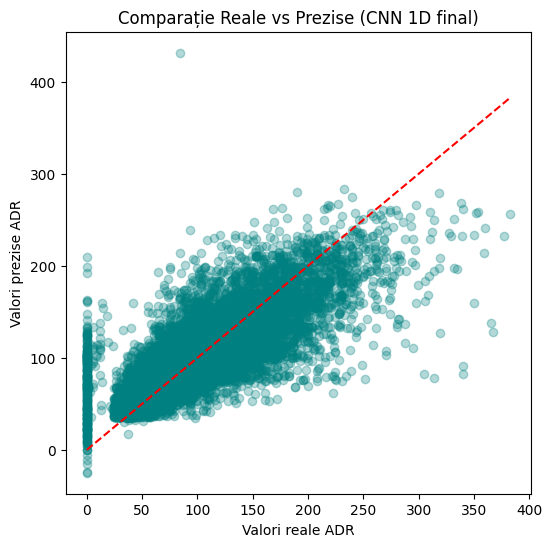

In [241]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_lr = 0.001
best_batch = 16
best_epochs = 50

model_final = Sequential([
    Conv1D(128, 3, activation='relu', input_shape=(7,1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

model_final.compile(optimizer=Adam(learning_rate=best_lr), loss='mse', metrics=['mae'])

history_final = model_final.fit(
    X_train_cnn, y_train,
    epochs=best_epochs,
    batch_size=best_batch,
    validation_split=0.1,
    verbose=1
)

# Evaluare pe setul de test
y_pred = model_final.predict(X_test_cnn)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n Evaluare pe test:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")

# Grafic: valori reale vs prezise
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Valori reale ADR")
plt.ylabel("Valori prezise ADR")
plt.title("Comparație Reale vs Prezise (CNN 1D final)")
plt.show()

Modelul greșește în medie cu ±23.68 unități ADR — o îmbunătățire substanțială față de versiunile anterioare (36–37).

Eroare pătratică rezonabilă; semnalează că mai există outlieri (ADR foarte mari).

Modelul explică ~57% din variația tarifului zilnic — foarte decent pentru date reale, unde comportamentul prețurilor este influențat de mulți factori externi (promotii, sezonalitate, tip cameră, canal de vânzare etc.).


In [242]:
model_final.save("cnn1d_final_model.keras")
print("Model salvat cu succes în cnn1d_final_model.keras!")

Model salvat cu succes în cnn1d_final_model.keras!
